This repository contains tools for single cell simulations in barrel cortex.

In [1]:
# To be able to use print "..." in python 3
from __future__ import print_function

# installation instructions, overview of this package

## Setup

If you are in the IBS-group, you can activate an environment, that already contains all of the packages mentioned below:
    
    source /nas1/Data_arco/prgr/anaconda2_florida/bin/activate in_silico_framework

To get a fresh installation, follow the following steps:

 1. download and install Anaconda 2.7 https://www.continuum.io/Downloads
 2. install neuron such that you can import it as python module. Version 7.4 has been tested, newer versions are likely to work. Detailed installation instructions can be found at http://www.davison.webfactional.com/notes/installation-neuron-python/. If you use Ubuntu and you have trouble compling neuron, it has been reported that installing the following packages solves the problem: `sudo apt-get install bison flex g++ libxt-dev xorg-dev python-dev libncurses5-dev`
 3. Add the neuron folder to your PATH environment variable, such that you can run `nrnivmodl` anywhere
 3. install the following dependencies:
    - sumatra, *used for parameterfiles*: `pip install sumatra`
    - pandas 0.19.2, *data analysis library*: `conda install pandas==0.19.2`
    - dask 0.16.1, *dynamic task scheduling and "big data" extension of pandas*: `conda install dask==0.16.1` #was 0.14.3
    - distributed 1.20.1 *allows non-bloccking computations and brings dask to a cluster*: `conda install distributed=1.20.1` #was 1.15.2
    - seaborn: *statistical data visualization*: `conda install seaborn==0.8.0`
    - fasterners: *robust file based locking*: `pip install fasteners`
    - jinja2: *html template engine, required for embedded animations*: `pip install jinja2`
 4. clone or pull this repository: `git clone https://github.com/abast/in_silico_framework.git`. 
 5. add your in_silico_framework folder to the PYTHONPATH variable
 6. unzip the following folder: in_silico_framework/getting_started/barrel_cortex.zip such that the following file exists: `in_silico_framework/getting_started/barrel_cortex/nrCells.csv`
 6. Open the file model_data_base/simrun2/seed_manager and adjust the variable `path`. This will specify the location where used seeds are saved. Any location where you have write access is suitable.
 7. run the test suite: `python run_tests.py`. 
 
 Due to the statistical nature of the model, some tests might fail from time to time. These tests have the word _statistical_ in their description. If such a test fails, run the testsuite again. If that test fails again, there most likely is an issue. Tests, that do not have a _statistical_ flag in their description may never fail.

    conda install -c anaconda lz4 
    conda install -c anaconda blosc 
    conda install -c conda-forge python-blosc 
    #conda install pytables
    pip install mock

    conda install -c anaconda gcc_linux-64
    conda install -c psi4 gcc-5
    conda install -c conda-forge binutils
    conda install -c conda-forge git

dask:0.14.3
distributed: 1.6.3
sklearn: 0.18.1
cloudpickle: 0.2.2
pandas: 0.19.2

dask:0.16.1
distributed: 1.20.1

## Packages in this repository you will most likely directly interact with

**singlecell_input_mapper**: Module for generating anatomical models, i.e. determining number and location of synapses and number and location of presynaptic cells

**single_cell_parser**: High level interface to the NEURON simulator providing methods to perform single cell simulations with synaptic input. The anatomical constraints of the synaptic input are provided by the single_cell_input_mapper module.

**simrun2**: High level interface to the single_cell_parser module providing methods for common simulation tasks. It also provides methods for building reduced models mimicing the full compartmental model.

**model_data_base**: Flexible database whose API mimics a python dictionary. It provides efficient and scalable methods to store and access simulation results at a terrabyte scale. It also generates metadata, indicating when the data was put in the database and the exact version of the in_silico_framework that was used at this timepoint. Simulation results from the single_cell_parser module can be imported and converted to a high performance binary format. Afterwards the data is accessible using the pandas data analysis library and dask. 

**single_cell_analyzer**: Library for analysis of single_cell_parser results. Use this module, if you specifically want to analyze a single simulation run. If you want to analyze the results of many simulation trails, the recomended way is to import the simulation results in a model_data_base and use pandas and dask for the analysis afterwards.

## Other packages

**mechanisms**: NEURON mechanisms (Ion channels, synapses, ...) used by the neuron simulator. If you run `import mechanisms`, these mechanisms are beeing compiled. Make sure, that you have the nrnivmodl executable in your path, otherwise this will not work

**test_simrun2, test_model_data_base, ...**: tests for the respective modules. To run the testsuite, use `python run_tests.py`

## How should I interact with these packages?

The recommended way is to use the `Interface` module which glues together all these packages mentioned above to one *Application*: It provides the API necessary to perform simulation tasks and provides additional methods that improve interactivity.

In [2]:
import Interface as I

trying to connect to distributed locking server {'type': 'file'}
[WARNING] ISF.isf_data_base.distributed_lock: Using file based locking. Please be careful on nfs mounts as file based locking has issues in this case.
Current version: heads/publish+0.gb6d0dc21.dirty
Current pid: 264899
Loading mechanisms:


Loaded modules with __version__ attribute are:
IPython: 7.19.0, Interface: heads/publish+0.gb6d0dc21.dirty, PIL: 8.2.0, _csv: 1.0, _ctypes: 1.1.0, _curses: b'2.2', _decimal: 1.70, argparse: 1.1, attr: 20.3.0, backcall: 0.2.0, blake3: 0.3.3, blosc: 1.10.2, bluepyopt: 1.9.126, bottleneck: 1.3.2, cffi: 1.14.3, click: 7.1.2, cloudpickle: 1.6.0, colorama: 0.4.4, csv: 1.0, ctypes: 1.1.0, cycler: 0.10.0, cytoolz: 0.11.0, dash: 2.9.3, dask: 2.30.0, dateutil: 2.8.1, deap: 1.3, decimal: 1.70, decorator: 4.4.2, distributed: 2.30.1, distutils: 3.8.5, filelock: 3.0.12, flask: 1.1.2, flask_cors: 4.0.0, frozendict: 2.3.8, fsspec: 0.8.3, future: 0.18.2, gevent: 20.9.0, greenlet: 0.4.17, ipaddress: 1.

Now, you can access the relevant packages, functions and classes directly:

In [3]:
I.scp # single_cell_parser package
I.sca # single_cell_analyzer package
I.DataBase # main class of isf_data_base
I.map_singlecell_inputs # compute anatomical model for a given cell morphology in barrel cortex 
I.simrun_run_new_simulations # default function for running single cell simulations with well constrained synaptic input
I.db_init_simrun_general.init # default method to initialize a model data base with existing simulation results
I.db_init_simrun_general.optimize # converts the data to speed optimized compressed binary format
I.synapse_activation_binning_dask # parallelized binning of synapse activation data
I.rm_get_kernel # create reduced lda model from simulation data

I.silence_stdout # context manager and decorator to silence functions
I.cache # decorator to cache functions

I.get_client() # get distributed.Client() object for parallel execution

I.np # numpy
I.pd # pandas
I.dask # dask
I.distributed # distributed
I.sns # seaborn
# ...

getting client with ip 10.102.2.81
got client <Client: 'tcp://10.102.2.81:38786' processes=24 threads=24, memory=98.30 GB>


<module 'seaborn' from '/gpfs/soma_fs/scratch/meulemeester/anaconda_isf3.8/lib/python3.8/site-packages/seaborn/__init__.py'>

Use autocompletion of IPython to find the other modules. To view the documentation, use a questionamrk, e.g.

In [4]:
I.db_init_simrun_general.init?

Signature:
I.db_init_simrun_general.init(
    db,
    simresult_path,
    core=True,
    voltage_traces=True,
    synapse_activation=True,
    dendritic_voltage_traces=True,
    parameterfiles=True,
    spike_times=True,
    burst_times=False,
    repartition=True,
    scheduler=None,
    rewrite_in_optimized_format=True,
    dendritic_spike_times=True,
    dendritic_spike_times_threshold=-30.0,
    client=None,
    n_chunks=5000,
    dumper=<module 'isf_data_base.IO.LoaderDumper.pandas_to_parquet' from '/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/isf_data_base/IO/LoaderDumper/pandas_to_parquet.py'>,
)
Docstring:
Use this function to load simulation data generated with the simrun2 module 
into a DataBase. 

After initialization, you can access the data from the isf_data_base in the following manner:
db['synapse_activation'], db['cell_activation'], db['voltage_traces'], db['spike_times'], ...
Use db.keys() to view all available data.

Note that the database does n

# Quickstart: How to run a simulation?

To run single cell simulations, we first need a hoc morphology file of that cell. Additionally, we need to know, how to distribute ion channels on that morphology, such that the cell has the desired biophysical properties. 

In the getting started subfolder of this repository, there is such a hoc-morphology and the corresponding parameter file. 
    - anatomical_constraints/86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center.hoc
    - biophysical_constraints/86_CDK_20041214_BAC_run5_soma_Hay2013_C2center_apic_rec.param
    
**Let's have a closer look at the parameters.**
    

In [5]:
from getting_started import getting_started_dir # path to getting started folder
cell_param = I.os.path.join(getting_started_dir, \
                            'biophysical_constraints', \
                            '86_CDK_20041214_BAC_run5_soma_Hay2013_C2center_apic_rec.param')
cell_param = I.scp.build_parameters(cell_param) # this is the main method to load in parameterfiles

`cell_param` is a nested dictionary. The biophysical parameters are described in the *neuron* key. Here, we specify ion channel conductances for all structures of the cell:

In [6]:
cell_param.neuron.keys()

dict_keys(['filename', 'Soma', 'Dendrite', 'ApicalDendrite', 'AIS', 'Myelin'])

The key *filename* points to the hoc morphology file. The others define ion channel conductances for the respective part of the cell. Let's figure out, what channels can be found in the basal dendrite:

In [7]:
cell_param.neuron.Dendrite

{'properties': {'Ra': 100.0, 'cm': 2.0},
 'mechanisms': {'global': {},
  'range': {'pas': {'spatial': 'uniform', 'g': 6.31e-05, 'e': -90.0},
   'Ih': {'spatial': 'uniform', 'gIhbar': 0.0002}}}}

In [8]:
cell_param.neuron

{'filename': '/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/getting_started/anatomical_constraints/86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center.hoc',
 'Soma': {'properties': {'Ra': 100.0,
   'cm': 1.0,
   'ions': {'ek': -85.0, 'ena': 50.0}},
  'mechanisms': {'global': {},
   'range': {'pas': {'spatial': 'uniform', 'g': 3.26e-05, 'e': -90},
    'Ca_LVAst': {'spatial': 'uniform', 'gCa_LVAstbar': 0.00462},
    'Ca_HVA': {'spatial': 'uniform', 'gCa_HVAbar': 0.000642},
    'SKv3_1': {'spatial': 'uniform', 'gSKv3_1bar': 0.983},
    'SK_E2': {'spatial': 'uniform', 'gSK_E2bar': 0.0492},
    'K_Tst': {'spatial': 'uniform', 'gK_Tstbar': 0.0471},
    'K_Pst': {'spatial': 'uniform', 'gK_Pstbar': 0.0},
    'Nap_Et2': {'spatial': 'uniform', 'gNap_Et2bar': 0.00499},
    'NaTa_t': {'spatial': 'uniform', 'gNaTa_tbar': 2.43},
    'CaDynamics_E2': {'spatial': 'uniform', 'decay': 770.0, 'gamma': 0.000616},
    'Ih': {'spatial': 'uniform', 'gIhbar': 8e-05}}}},


Here you see that we only have the passive conductance and If channels, both uniformly distributed along the dendrite. There are much more channels in the apical dendrite. A comprehensive description of the other parts of the cell parameter file can be found here: #todo

## **Now, we can do some current injection experiments to analyze the biophysical properties of the model.** 

In [9]:
# set up cell. This creates a lot of (interesting) diagnostic output. Remove the context manager to see it
from simrun2.utils import scale_apical
cell = I.scp.create_cell(cell_param.neuron, scaleFunc = scale_apical)

Let's figure out some general properties of the cell

In [10]:
print('total length = {:.0f} micron'.format(sum([sec.L for sec in cell.sections])))
print('total dendritic length = {:.0f} micron'.format(sum([sec.L for sec in cell.sections \
                                                           if sec.label in ['Soma', 'Dendrite', 'ApicalDendrite']])))
print('soma area = {:.0f} micron^2'.format(sum([sec.area for sec in cell.sections if sec.label == 'Soma'])))
print('apical dendrite area = {:.0f} micron^2'.format(sum([sec.area for sec in cell.sections \
                                                           if sec.label == 'ApicalDendrite'])))

total length = 16340 micron
total dendritic length = 15290 micron
soma area = 916 micron^2
apical dendrite area = 27212 micron^2


<a id='WhyWeNeedScaling'></a>
The respective hoc morphology has a very thin apical dendrite which does not allow electric coupling between apical dendrite and soma. We figured that it is necessary to scale up the diameter of the trunc.

In [11]:
# load scaled hoc morphology
cell_param.neuron.filename = I.os.path.join(getting_started_dir, 'anatomical_constraints', \
                            '86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_scaled_diameters.hoc')
with I.silence_stdout:
    cell = I.scp.create_cell(cell_param.neuron)
print('apical dendrite area = {:.0f} micron^2'.format(sum([sec.area for sec in cell.sections \
                                                           if sec.label == 'ApicalDendrite'])))

apical dendrite area = 27212 micron^2


Let's quickly see what this cell looks like

Initialised simulation data in 0.02 seconds


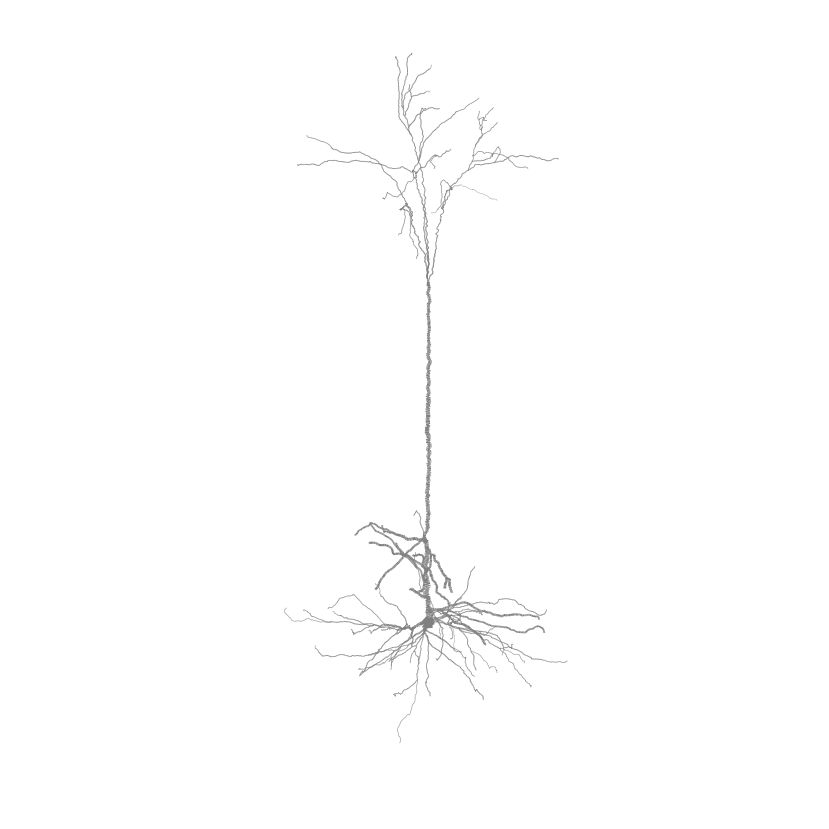

In [12]:
from visualize.cell_morphology_visualizer import CellMorphologyVisualizer
import matplotlib
%matplotlib inline
cmv = CellMorphologyVisualizer(cell)
ax = cmv.show_morphology_3d()

Now, we put a pipette at the soma of the cell and inject a short rectangular current

In [13]:
import neuron
h = neuron.h

In [14]:
iclamp = h.IClamp(0.5, sec=cell.soma)
iclamp.delay = 150 # give the cell time to reach steady state
iclamp.dur = 5 # 5ms rectangular pulse
iclamp.amp = 1.9 # 1.9 ?? todo ampere

CPU times: user 547 ms, sys: 4.22 ms, total: 552 ms
Wall time: 551 ms


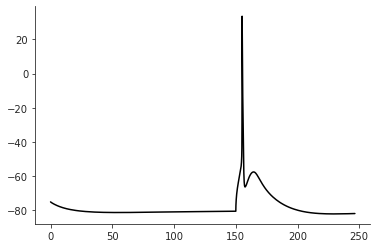

In [15]:
%time I.scp.init_neuron_run(cell_param.sim, vardt=True) # run the simulation 
%matplotlib inline
I.sns.set_style('ticks')
I.plt.plot(cell.tVec, cell.soma.recVList[0], c = 'k')
I.sns.despine()

In [20]:
import matplotlib as mpl
cmv = CellMorphologyVisualizer(cell)
cmv.show_dendritic_groups_in_morphology()

Initialised simulation data in 0.16 seconds


AttributeError: 'list' object has no attribute 'keys'

How does the cell respond to different amplitudes of the step current?

In [ ]:
cell_param.sim.tStop = 3000
iclamp.dur = 2000
iclamp.delay = 500
simresult = {}
for amp in [0.619, 0.793, 1.507]:
    iclamp.amp = amp
    I.scp.init_neuron_run(cell_param.sim, vardt=True)
    simresult[amp] = I.np.array(cell.tVec), I.np.array(cell.soma.recVList[0])

KeyboardInterrupt: 

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x2aaeb1b219d0> (for post_execute):


KeyboardInterrupt: 

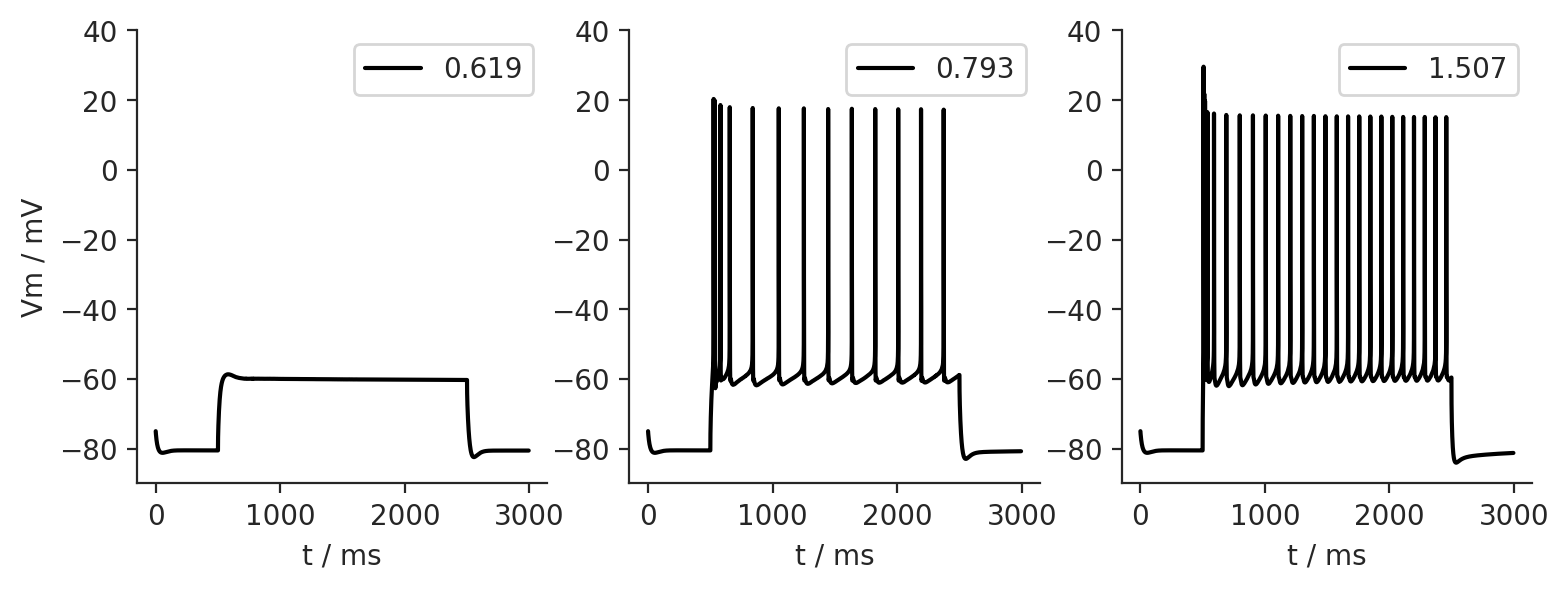

In [ ]:
fig = I.plt.figure(figsize = (9,3), dpi = 200)
for lv, k in enumerate(sorted(simresult.keys())):
    ax = fig.add_subplot(1,3,lv+1)
    ax.plot(*simresult[k], label = k, c = 'k')
    ax.legend(loc = 'upper right')
    ax.set_ylim([-90, 40])
    ax.set_xlabel('t / ms')
    if lv == 0:
        ax.set_ylabel('Vm / mV')
I.sns.despine()

Now let's place a pipette on the apical trunk at a soma distance of 620 microns and inject current synchronously at this position and at the soma. For the current at the soma, we choose a rectangular pulse again. The current at the apical injection site should resemble the shape of a evoked post synaptic potential (epsp). Have a look at the folder mechanisms/synapses to see how epsp is implemented in hoc code.

In [ ]:
# map between sections and somadistance
sec_dist_dict = {cell.distance_to_soma(sec, 1.0): sec for sec in cell.sections}

def get_section_at_distance(cell, dist):
    dummy = {k - dist: v for k,v in sec_dist_dict.items() if k > dist}
    closest_sec = dummy[min(dummy)]
    x = (dist - cell.distance_to_soma(closest_sec, 0.0)) / closest_sec.L
    return x, closest_sec

In [ ]:
cell_param.sim.tStop = 500
x, sec = get_section_at_distance(cell, 620)

iclamp = h.IClamp(0.5, sec=cell.soma)
iclamp.delay = 295 # give the cell time to reach steady state
iclamp.dur = 5 # 5ms rectangular pulse
iclamp.amp = 1.9 # 1.9 ?? todo ampere

iclamp2 = h.epsp(x, sec=sec)
iclamp2.onset = 300
iclamp2.imax = 0.5
iclamp2.tau0 = 1.0 # rise time constant
iclamp2.tau1 = 5 # decay time constant
cell.iclamp2 = iclamp2

%time I.scp.init_neuron_run(cell_param.sim, vardt=True) # run the simulation 

CPU times: user 1.1 s, sys: 5.88 ms, total: 1.1 s
Wall time: 1.1 s


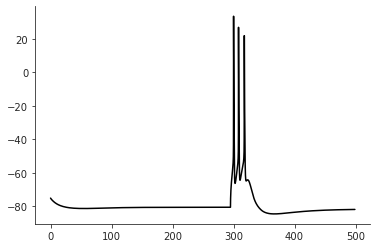

In [ ]:
I.plt.plot(cell.tVec, cell.soma.recVList[0], c = 'k')
I.sns.despine()

So far, we have only visualized the somatic membrane potential. Now, we create a short animation, where the whole dendrite is visualized (x-axis: soma distance of dendrite segment, y-axis: Vm)

In [ ]:
import os
db = I.DataBase('{}/labs/getting_started_db/'.format(os.environ['HOME'])) # create a DataBase to save .png-frames of the animation

see section [DataBase](#DataBase) for a more detailed descritpion

In [ ]:
from IPython import display


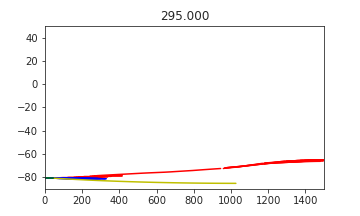
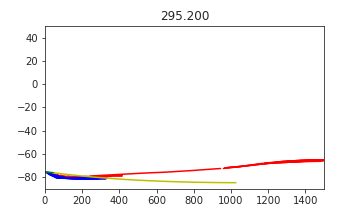
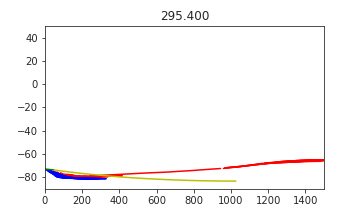
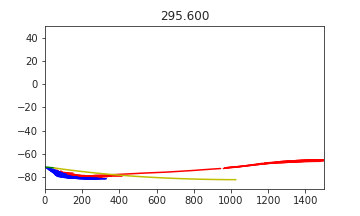
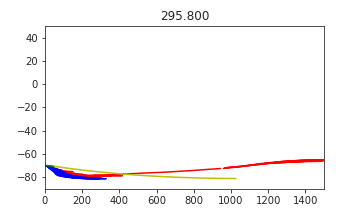
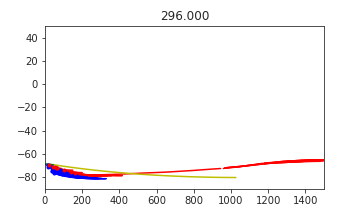
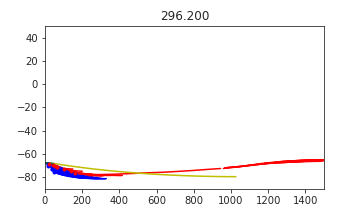
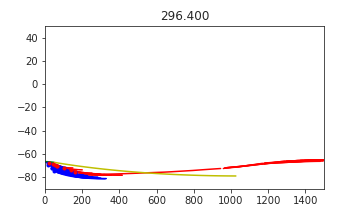
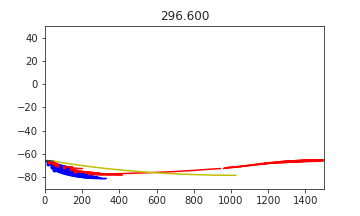
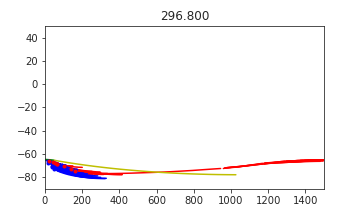
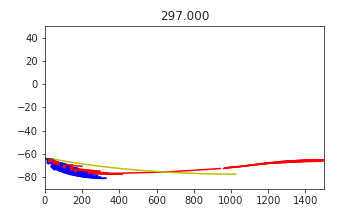
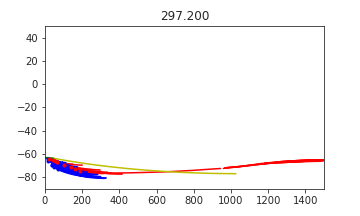
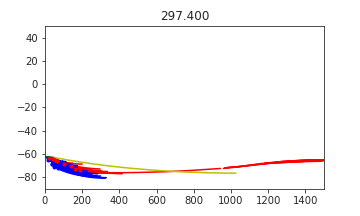
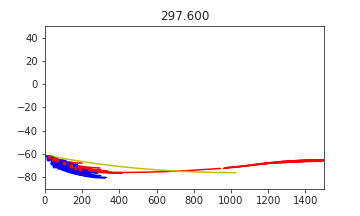
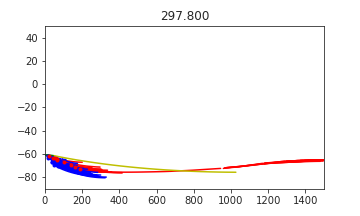
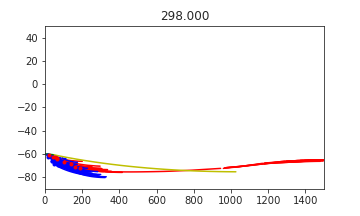
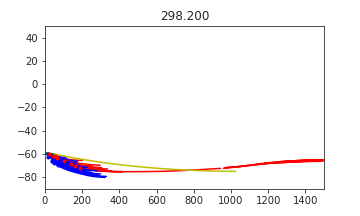
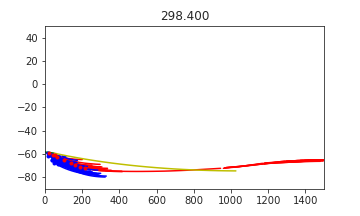
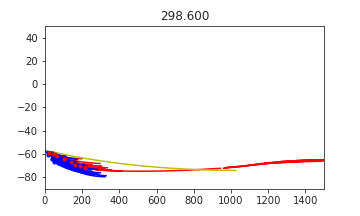
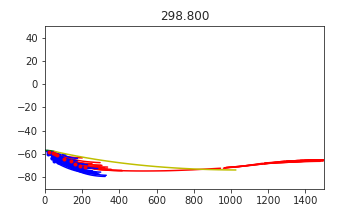
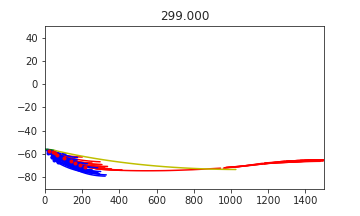
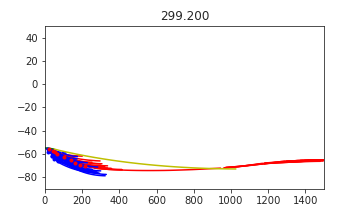
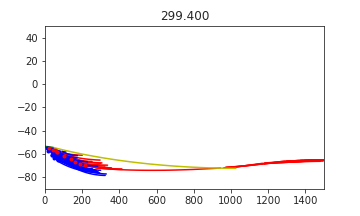
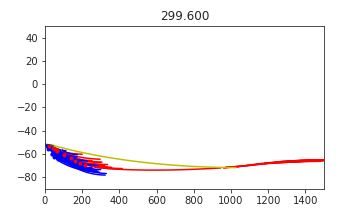
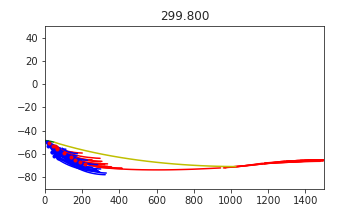
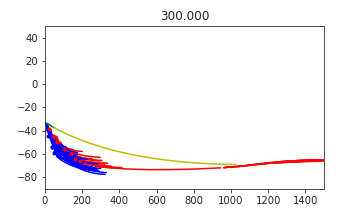
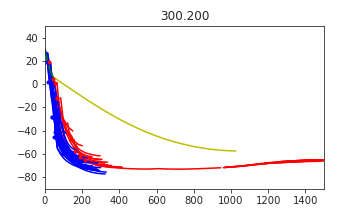
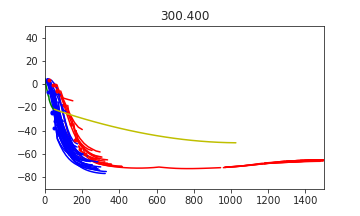
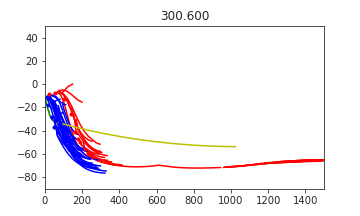
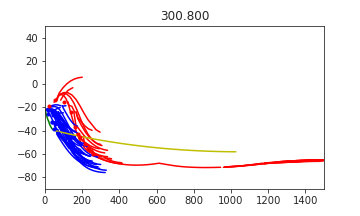
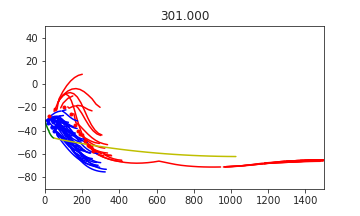
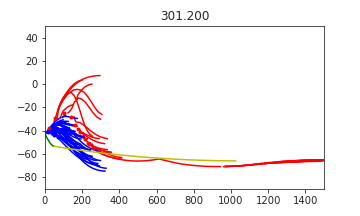
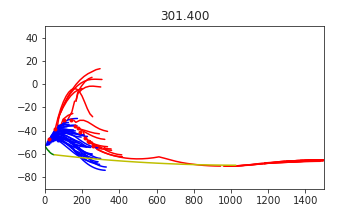
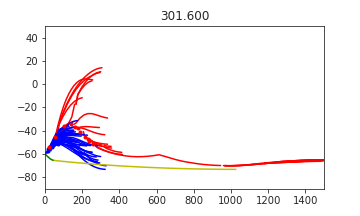
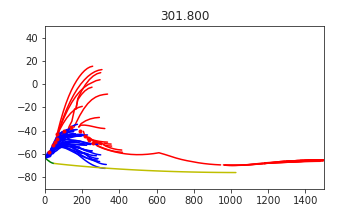
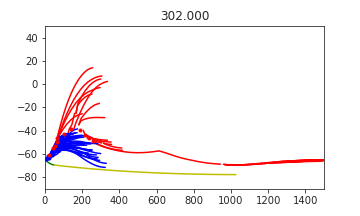
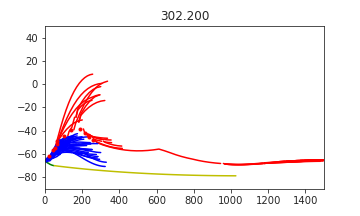
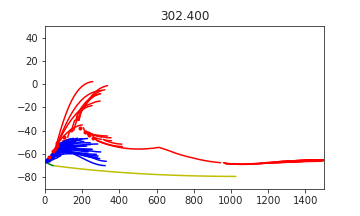
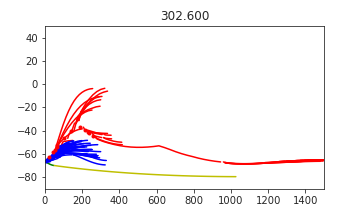
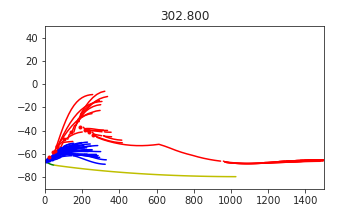
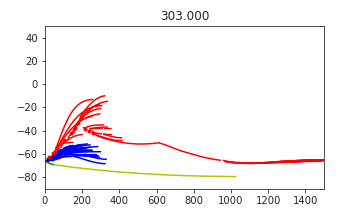
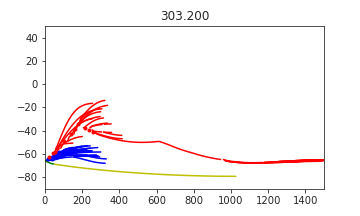
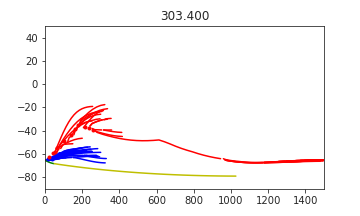
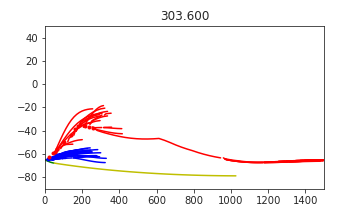
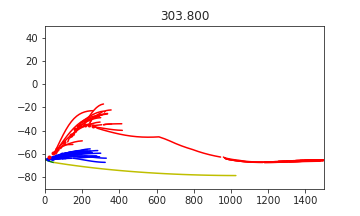
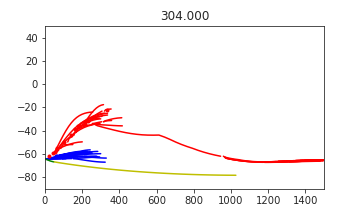
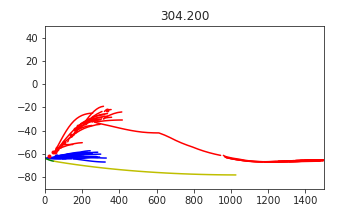
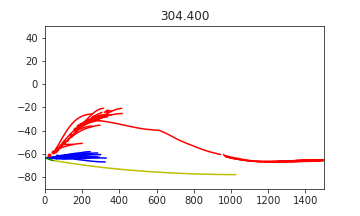
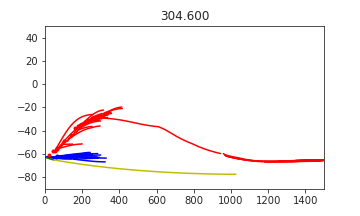
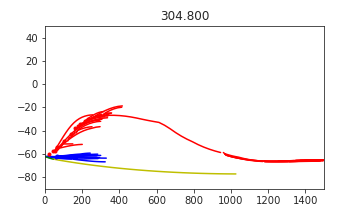
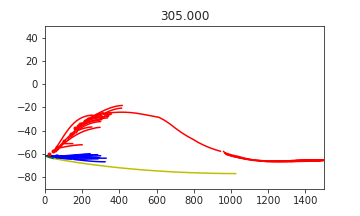
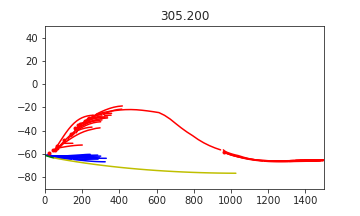
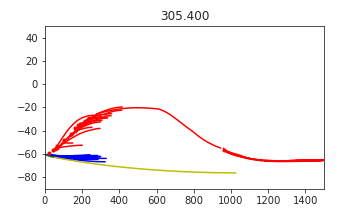
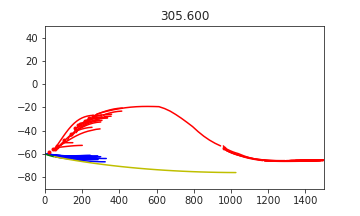
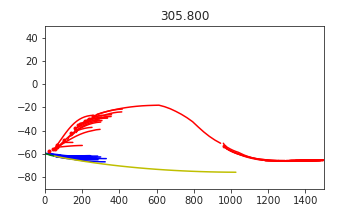
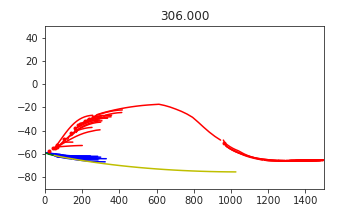
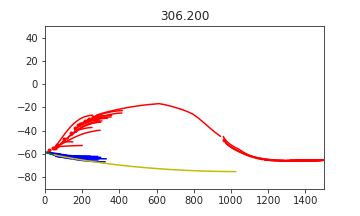
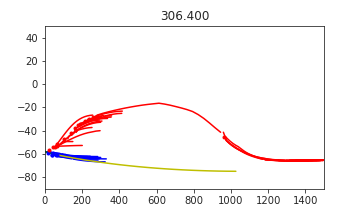
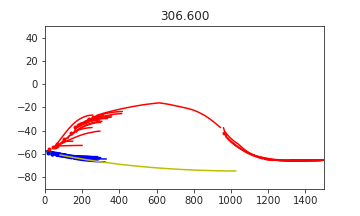
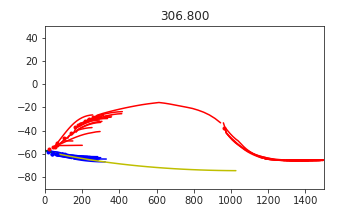
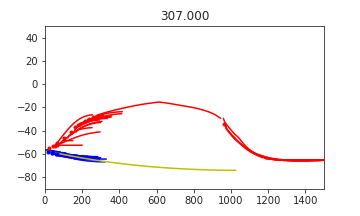
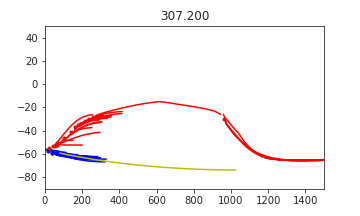
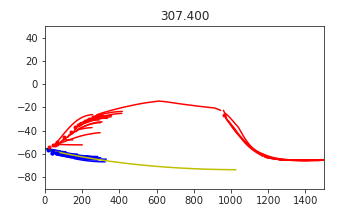
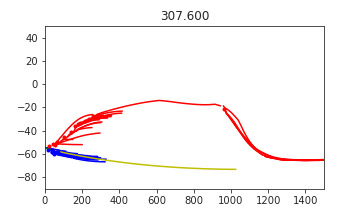
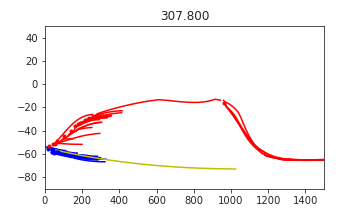
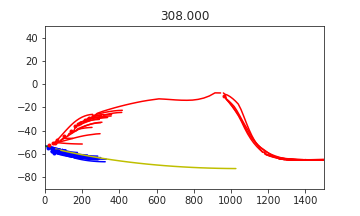
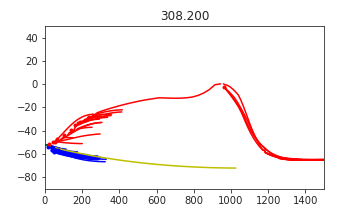
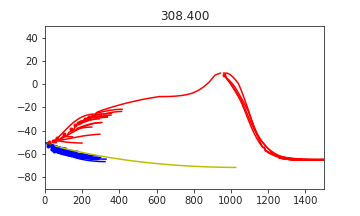
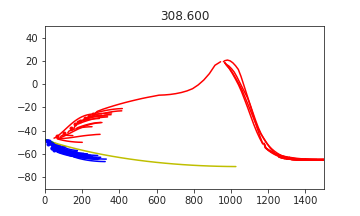
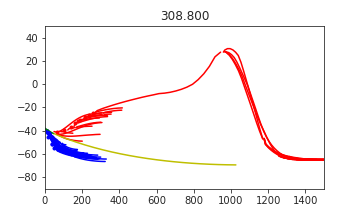
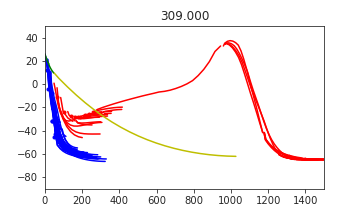
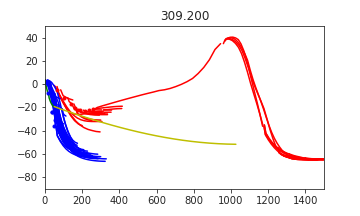
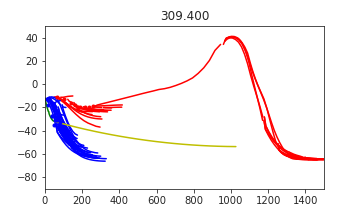
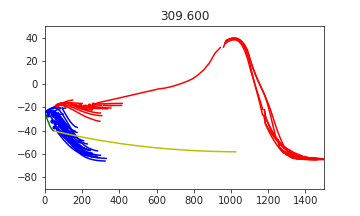
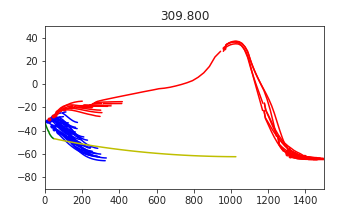
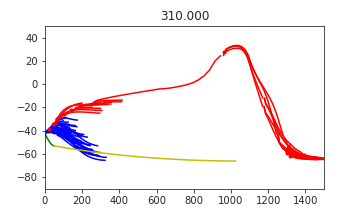
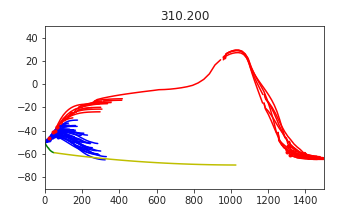
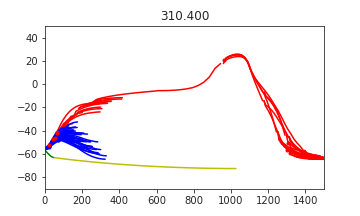
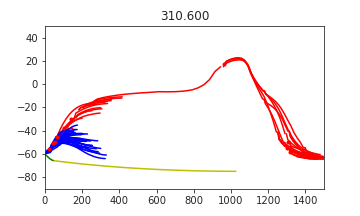
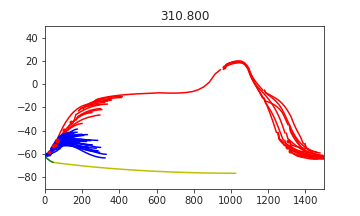
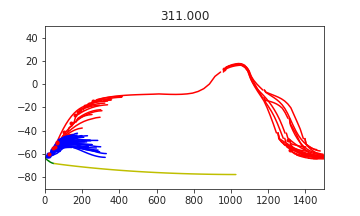
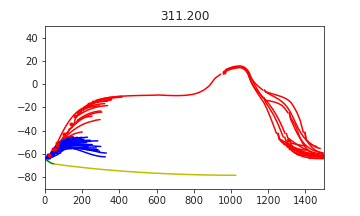
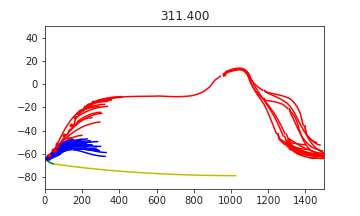
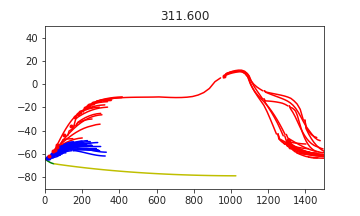
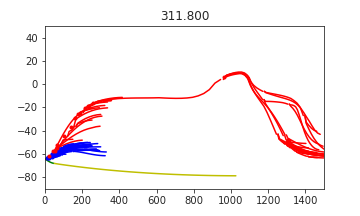
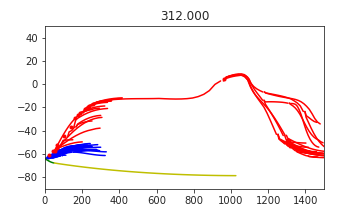
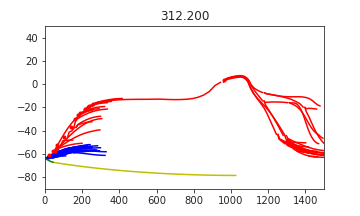
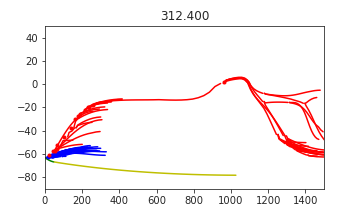
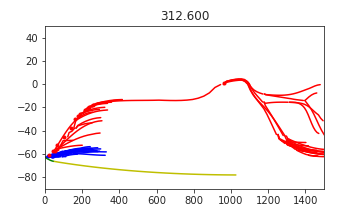
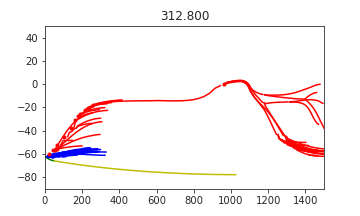
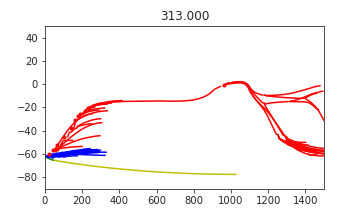
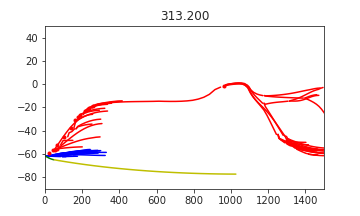
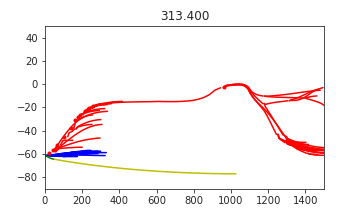
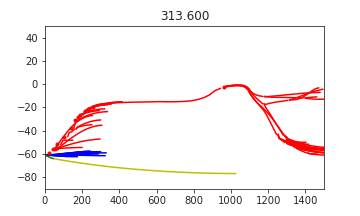
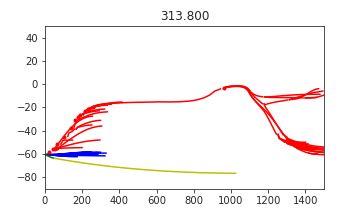
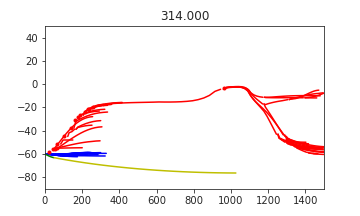
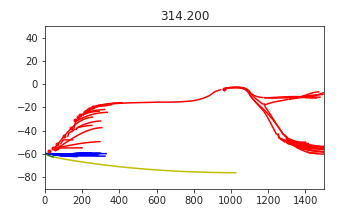
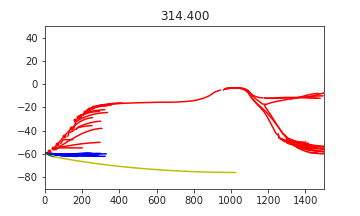
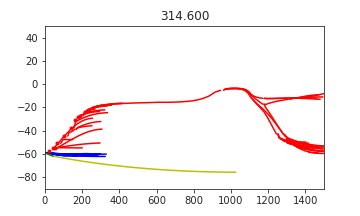
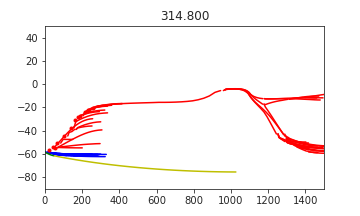
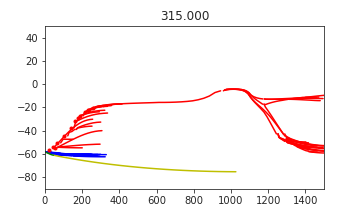
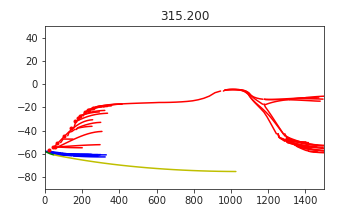
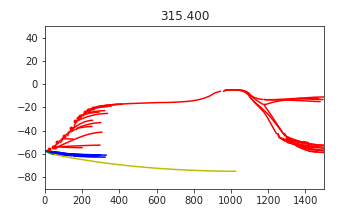
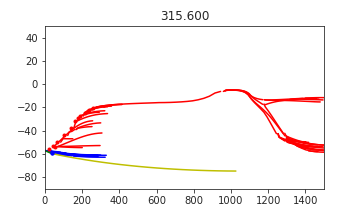
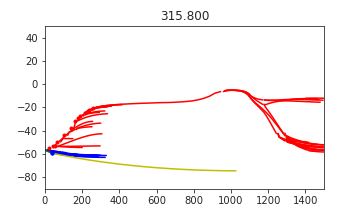
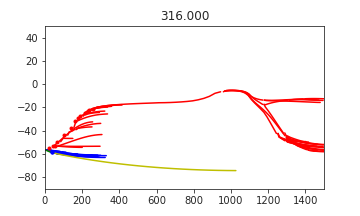
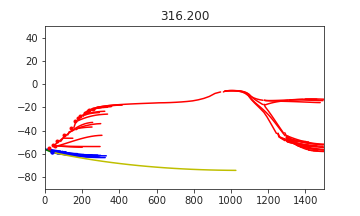
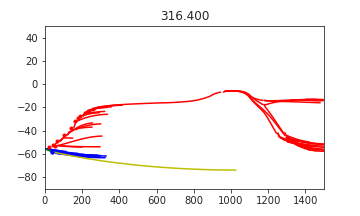
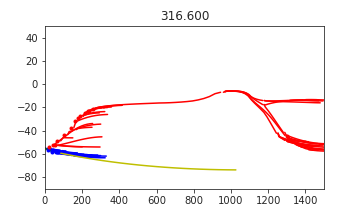
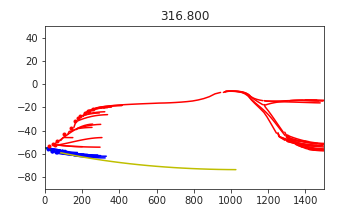
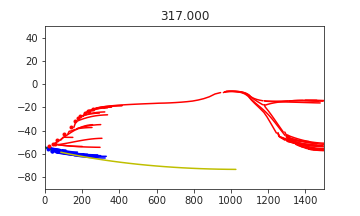
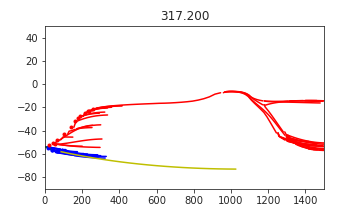
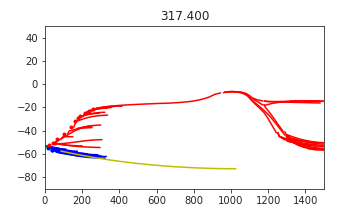
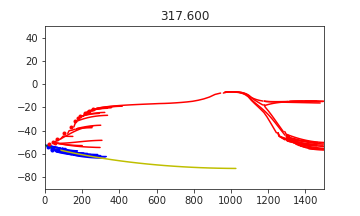
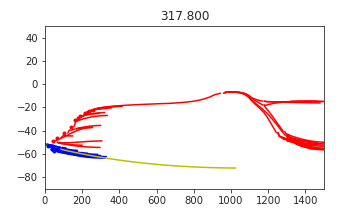
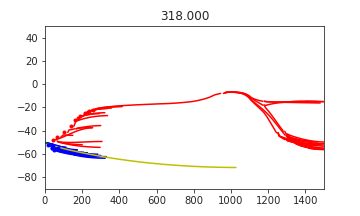
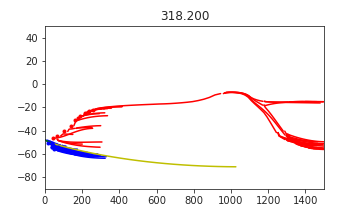
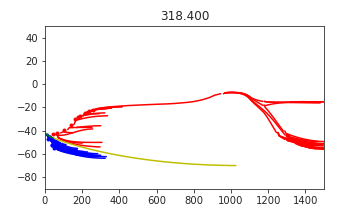
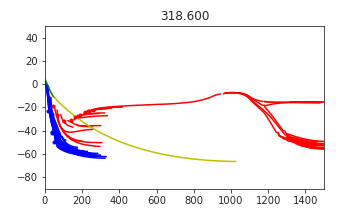
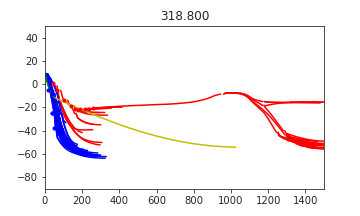
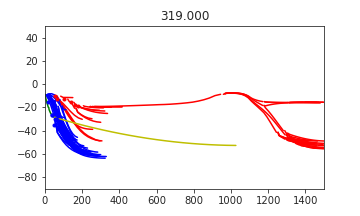
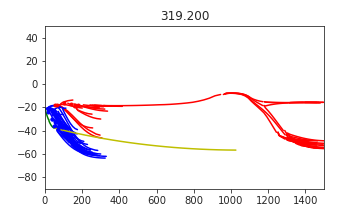
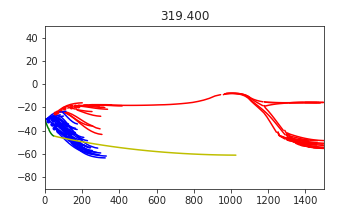
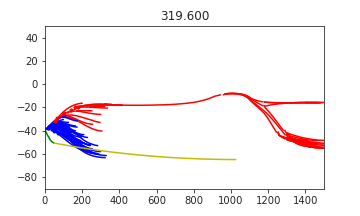
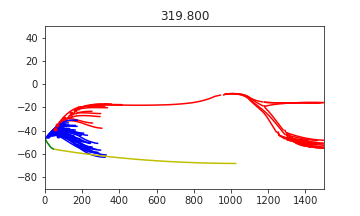
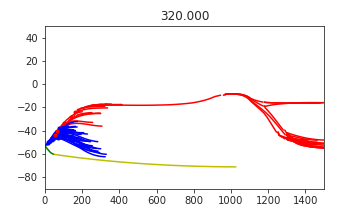
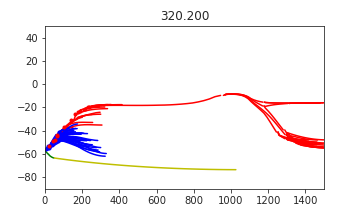
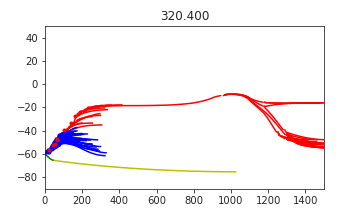
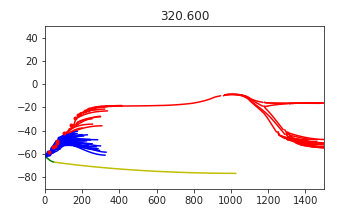
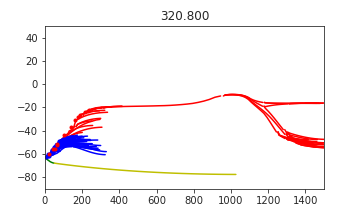
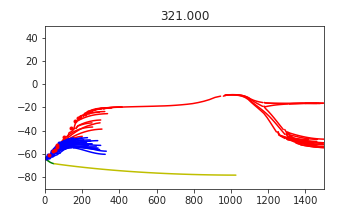
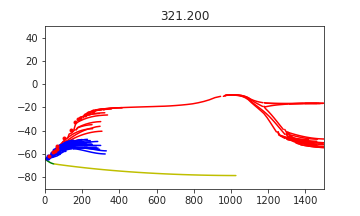
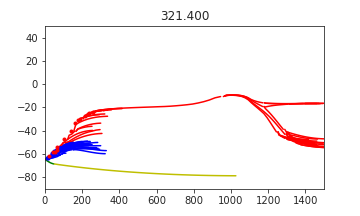
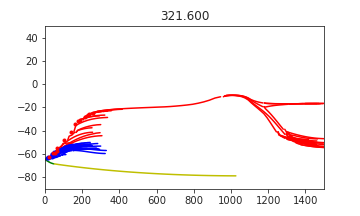
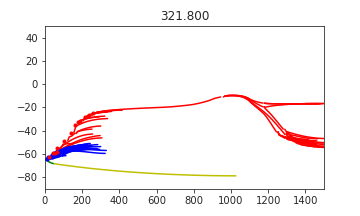
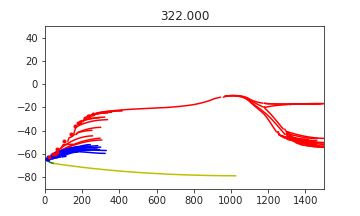
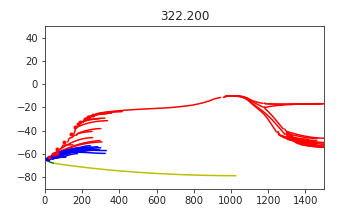
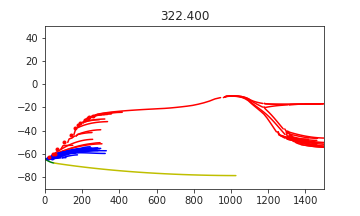
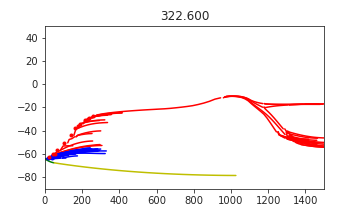
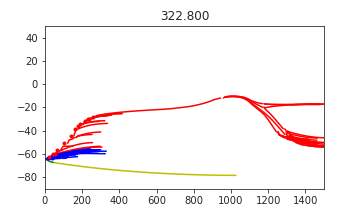
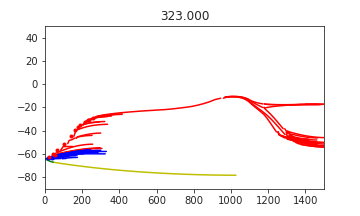
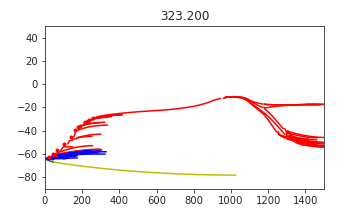
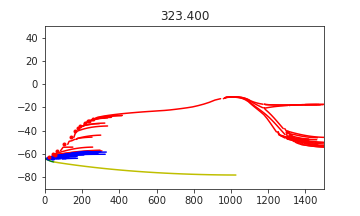
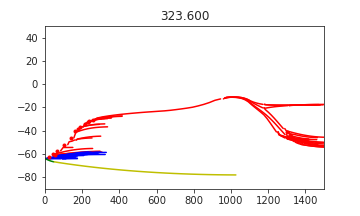
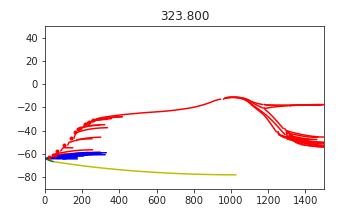
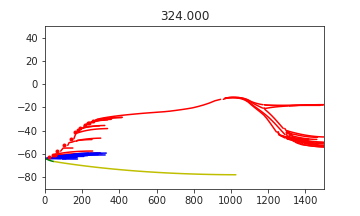
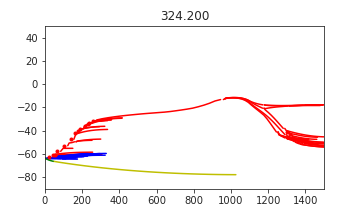
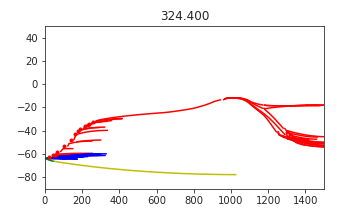
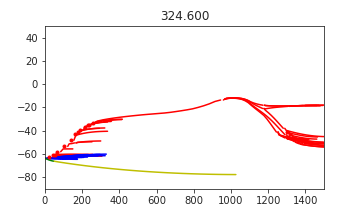
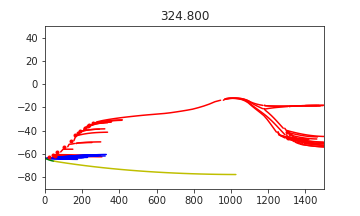
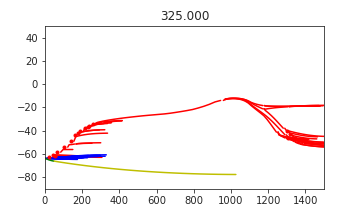
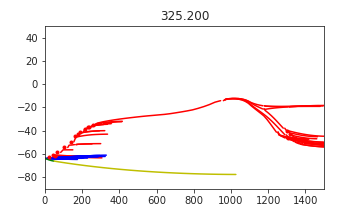
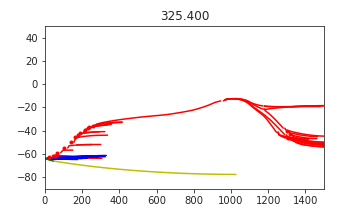
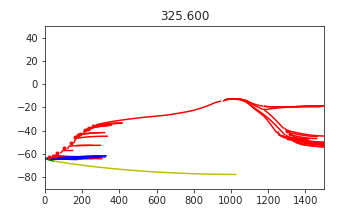
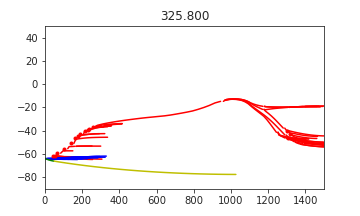
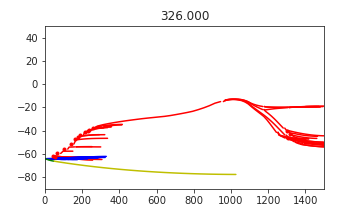
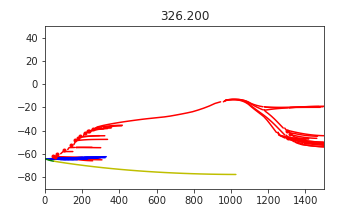
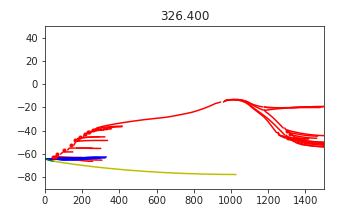
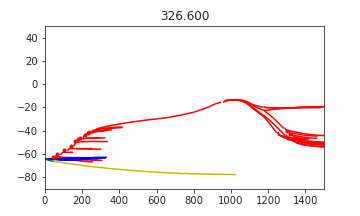
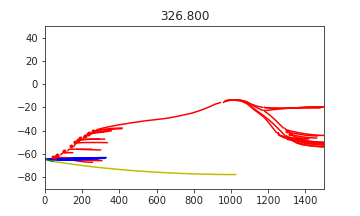
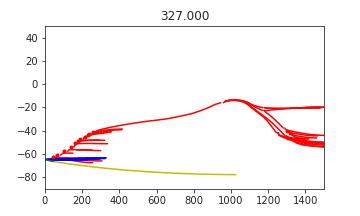
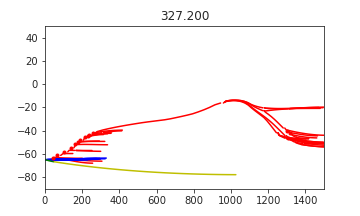
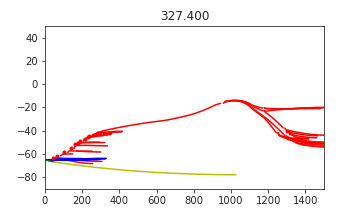
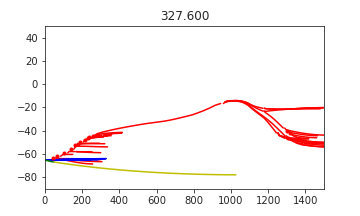
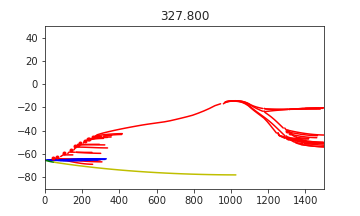
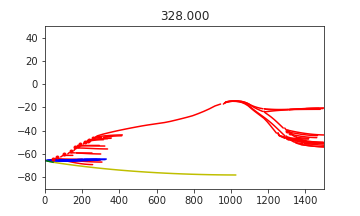
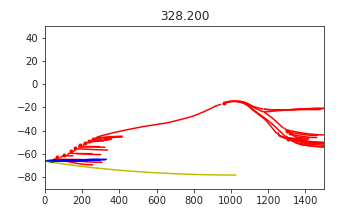
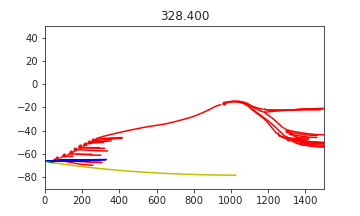
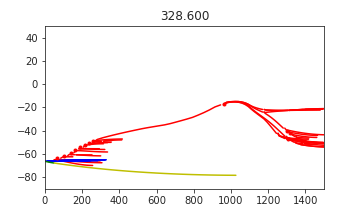
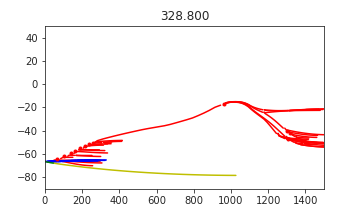
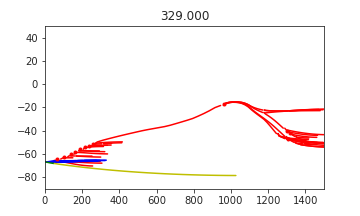
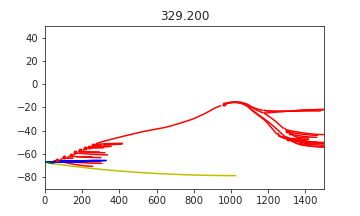
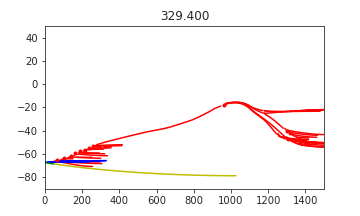
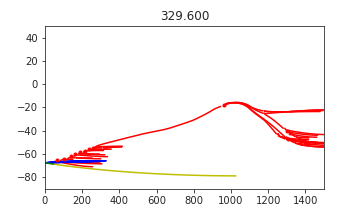
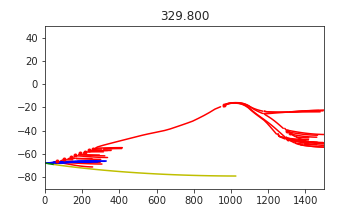
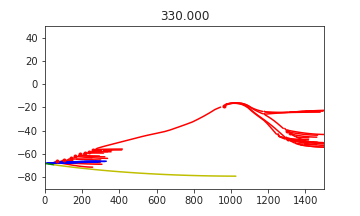
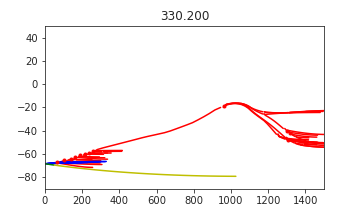
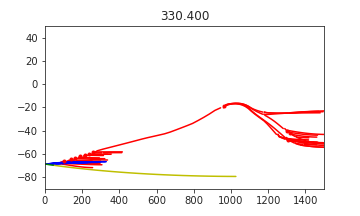
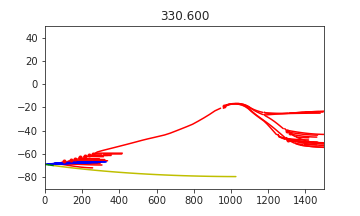
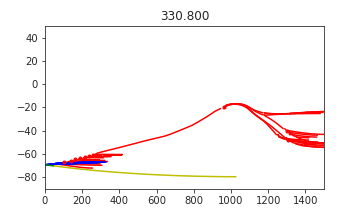
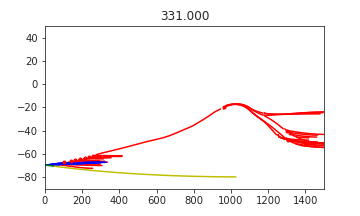
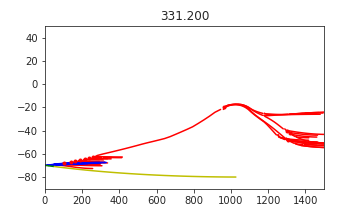
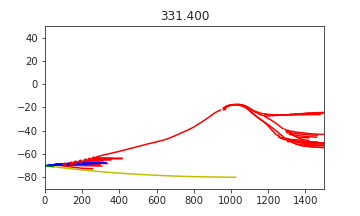
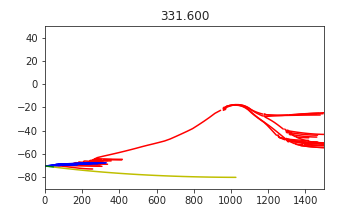
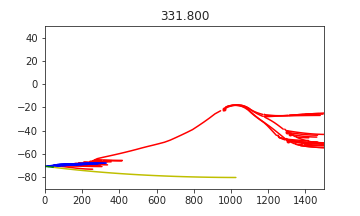
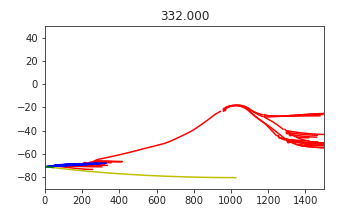
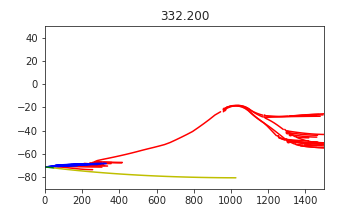
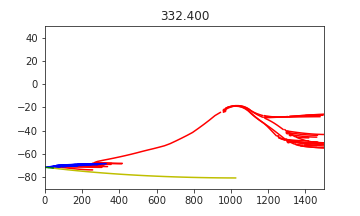
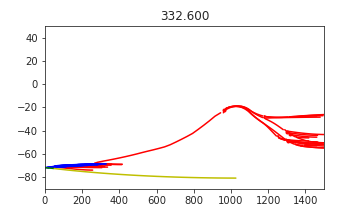
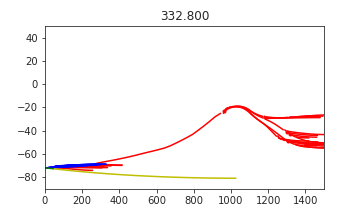
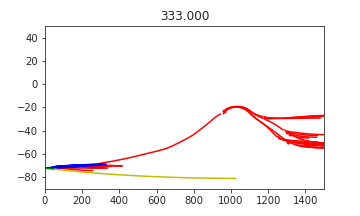
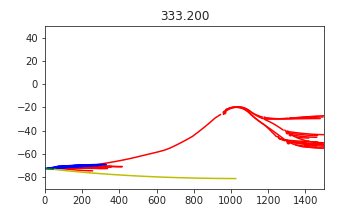
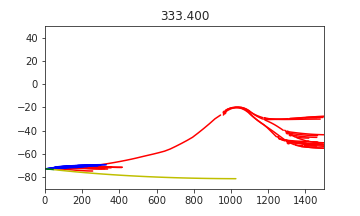
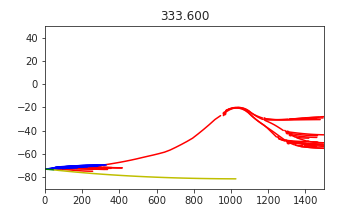
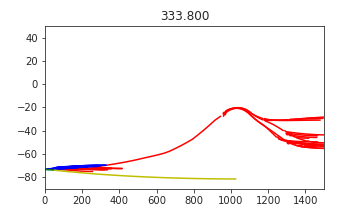
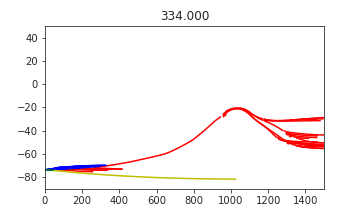
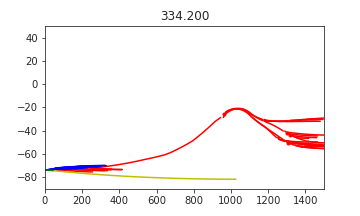
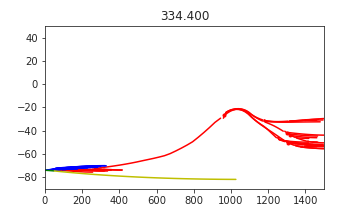
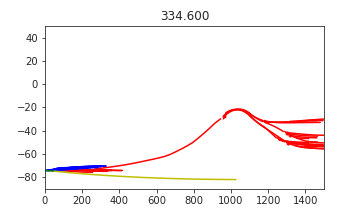
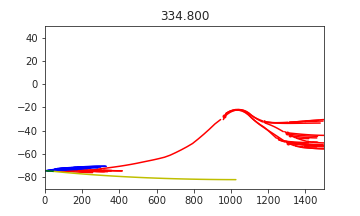
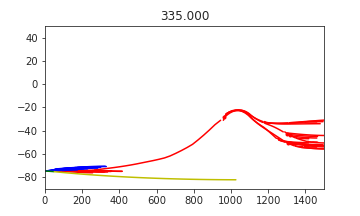
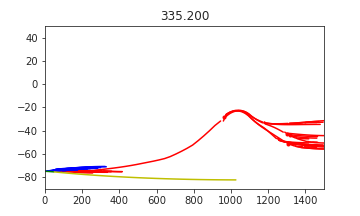
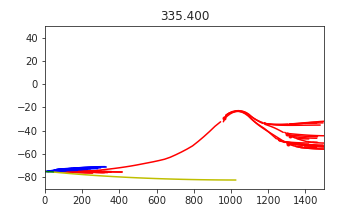
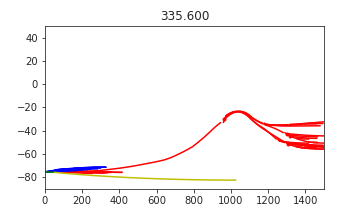
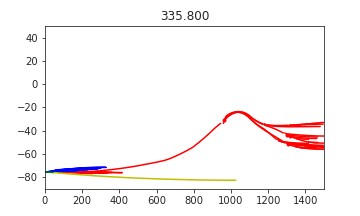
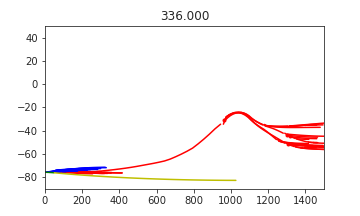
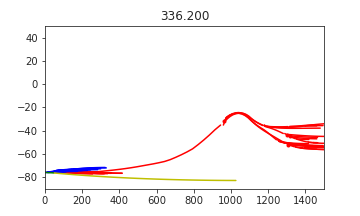
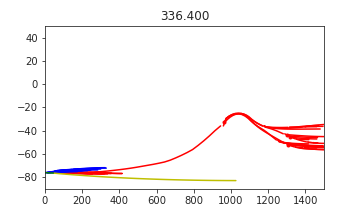
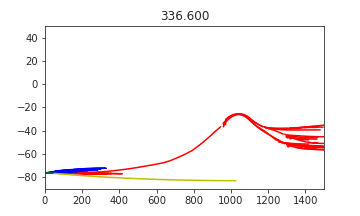
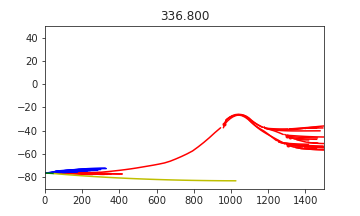
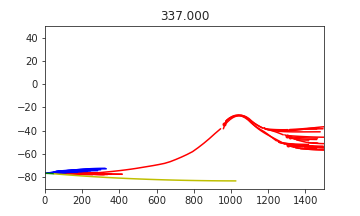
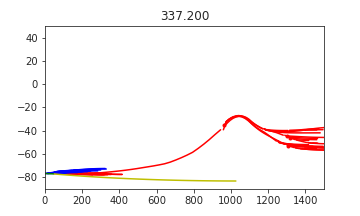
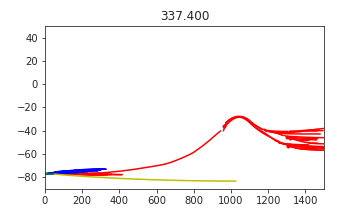
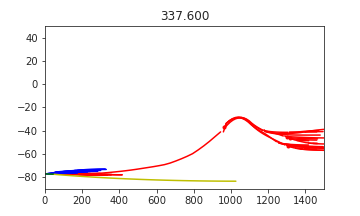
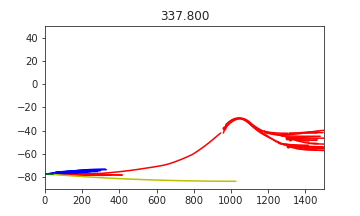
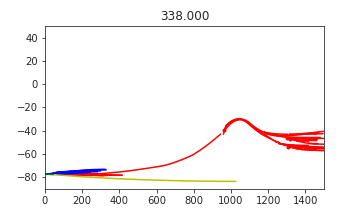
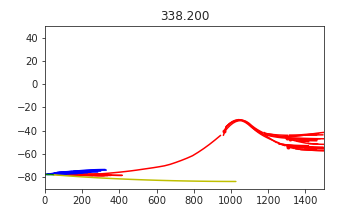
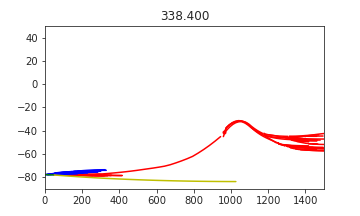
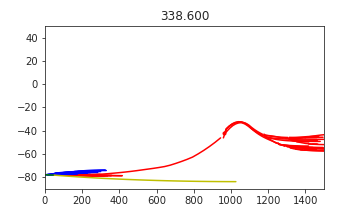
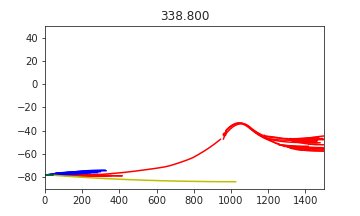
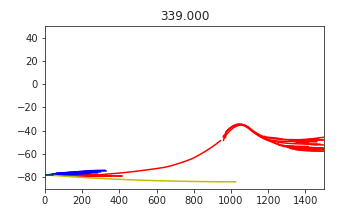
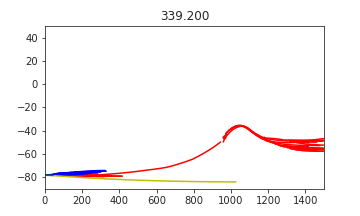
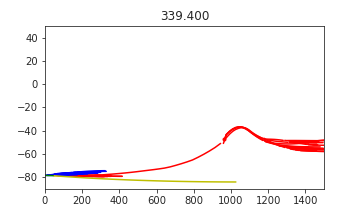
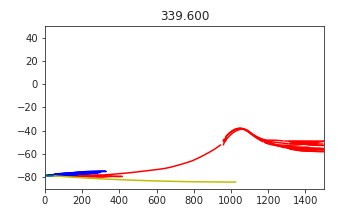
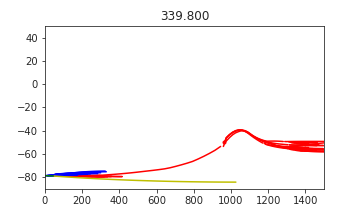
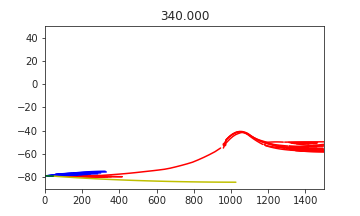
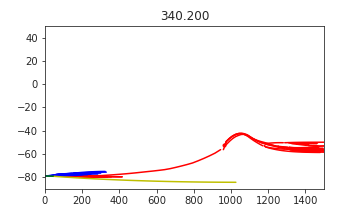
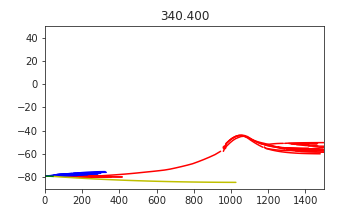
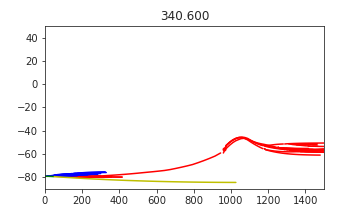
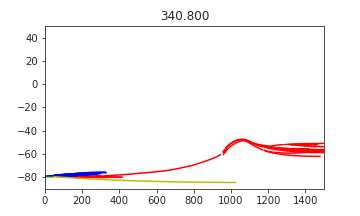
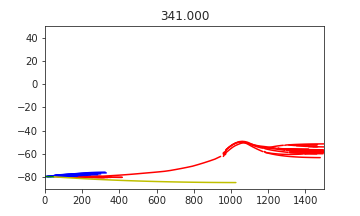
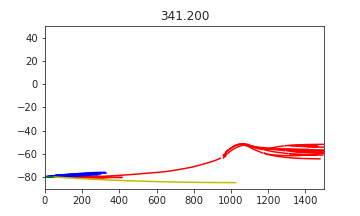
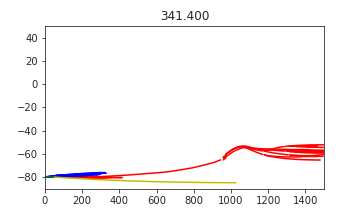
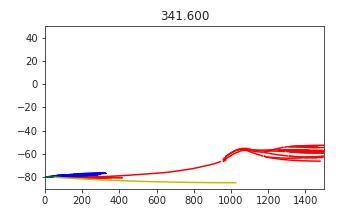
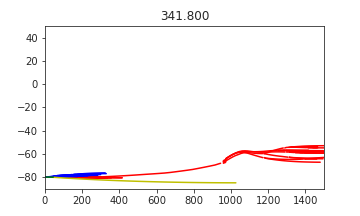
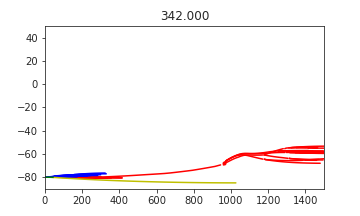
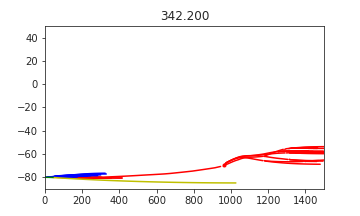
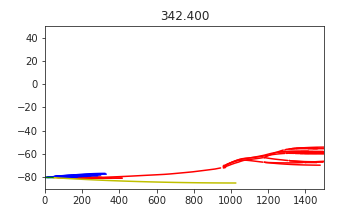
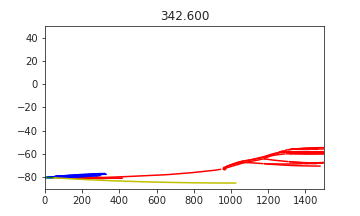
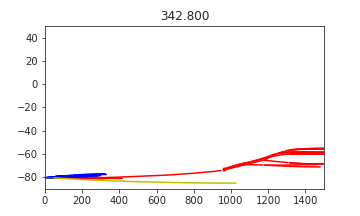
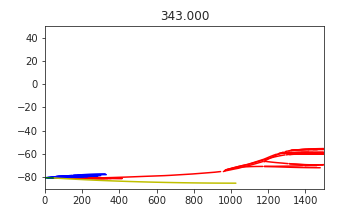
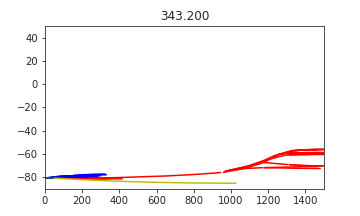
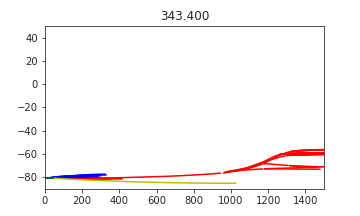
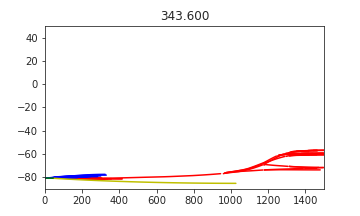
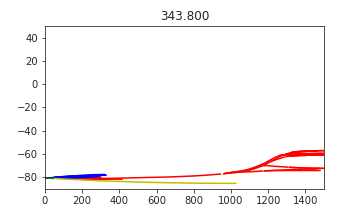
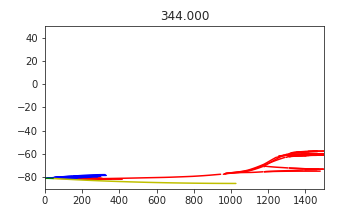
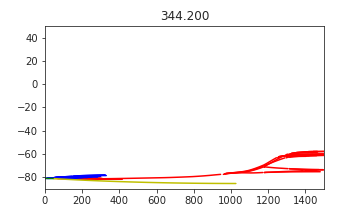
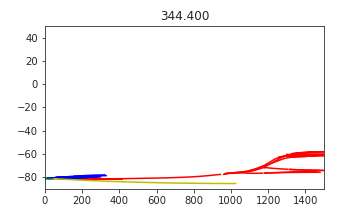
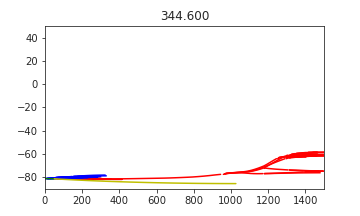
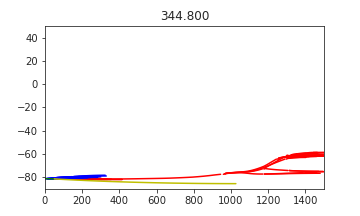
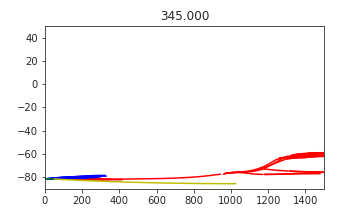
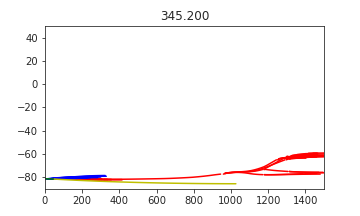
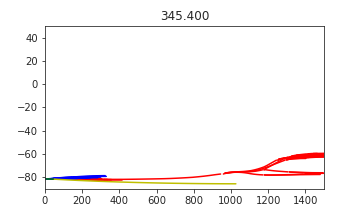
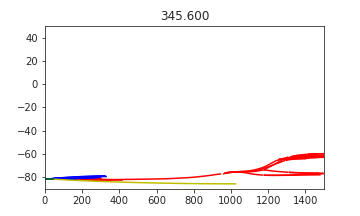
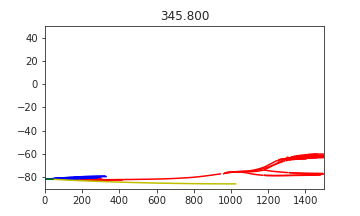
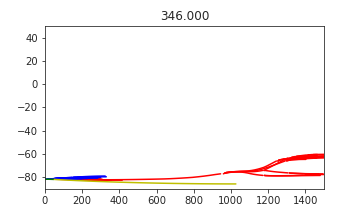
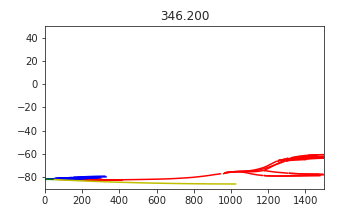
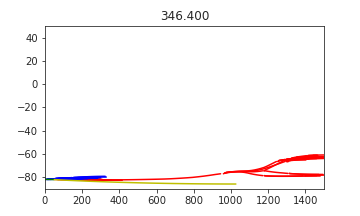
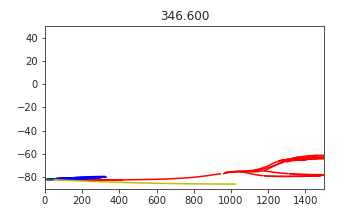
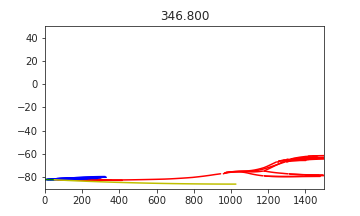
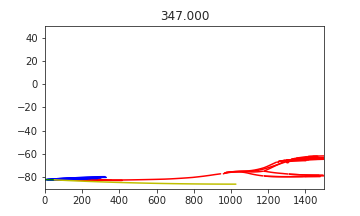
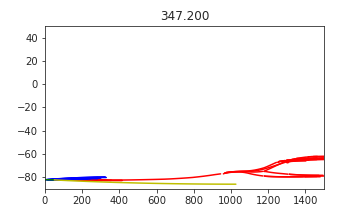
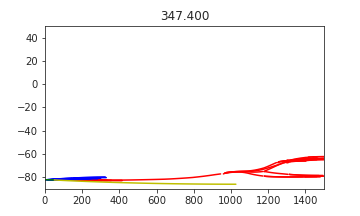
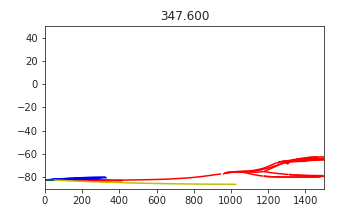
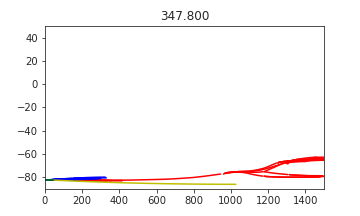
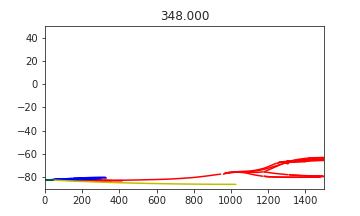
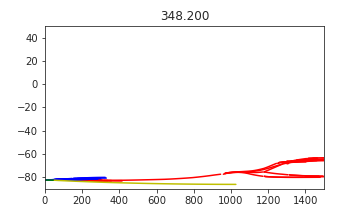
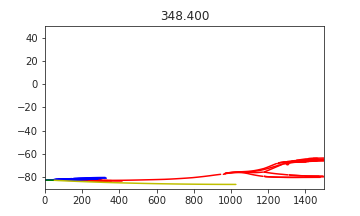
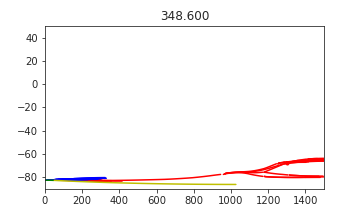
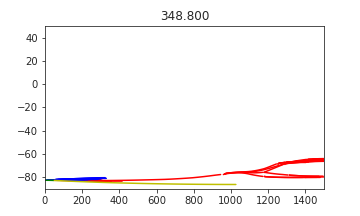
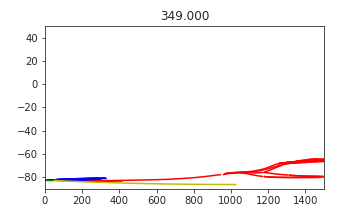
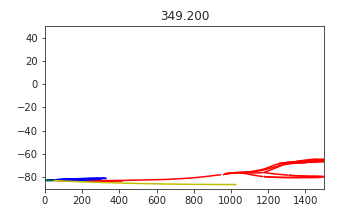
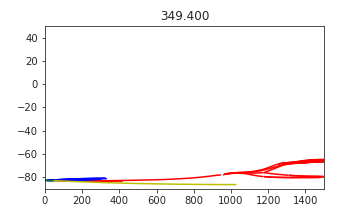
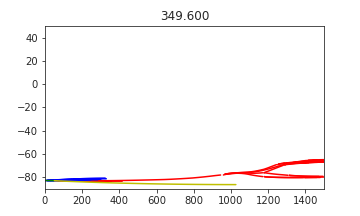
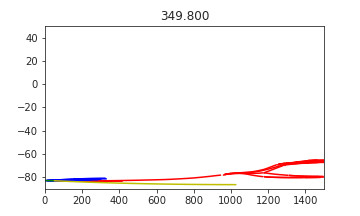

In [ ]:
if not 'burst_trail_video' in db.keys():
    I.scp.init_neuron_run(cell_param.sim, vardt=False) # fixed step size necessary for animation
    I.cell_to_animation(cell, \
                        xlim = [0,1500], \
                        ylim = [-90, 50], \
                        tstart = 295, \
                        tend = 350, \
                        tstep = 0.2, \
                        outdir = db.create_managed_folder('burst_trail_video'))
I.display_animation(db['burst_trail_video'].join('*', '*.png'), embedded=True)

We can also visualize current through ion channels. Let's have a look at the calcium current through low voltage activated calcium channels:


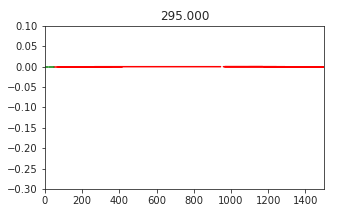
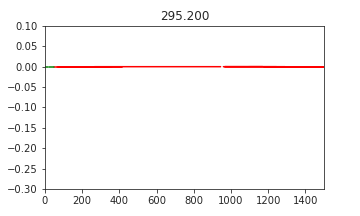
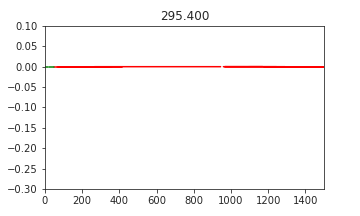
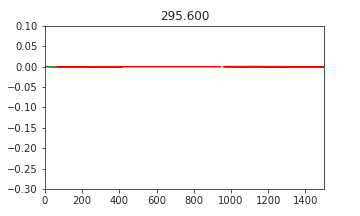
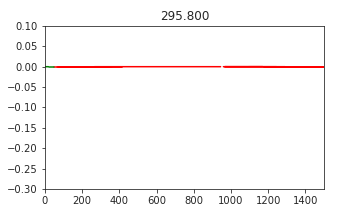
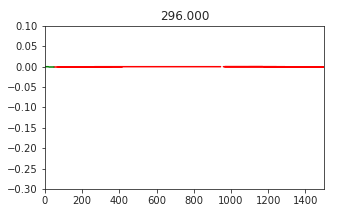
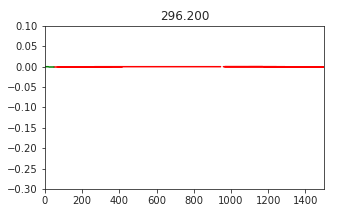
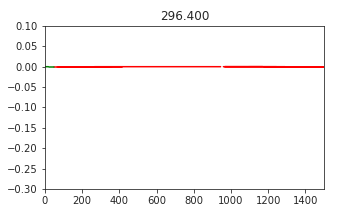
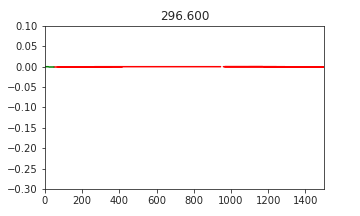
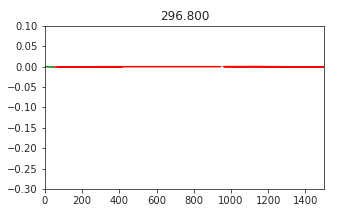
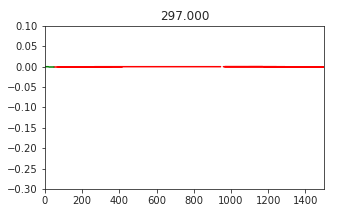
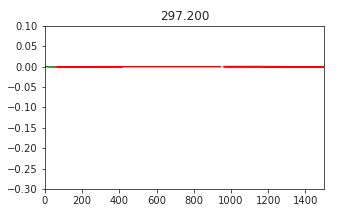
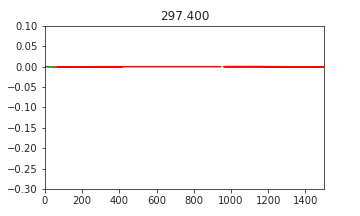
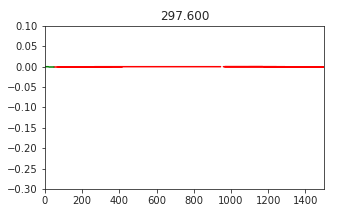
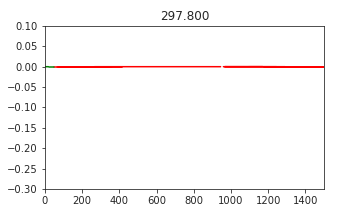
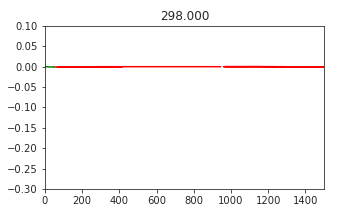
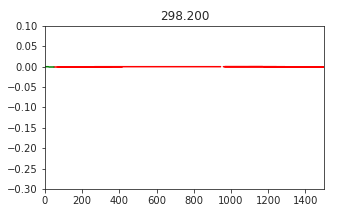
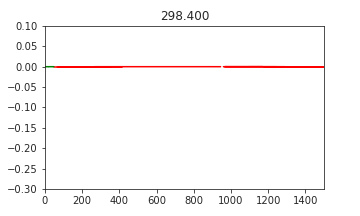
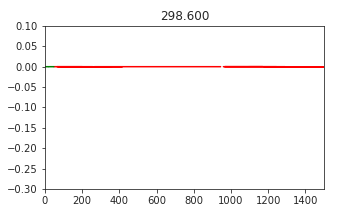
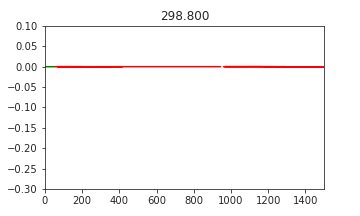
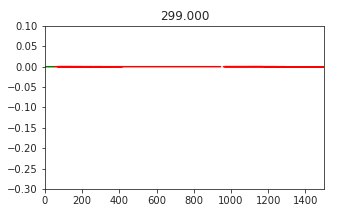
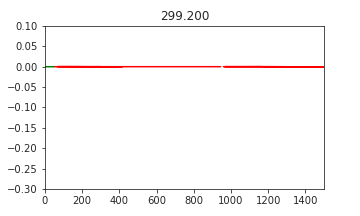
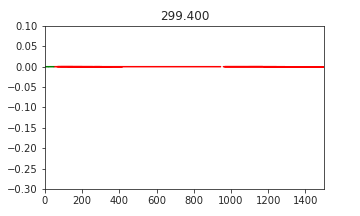
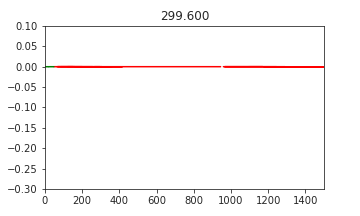
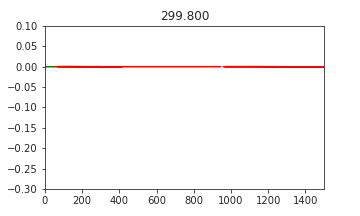
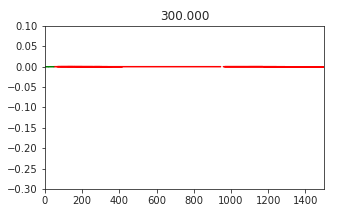
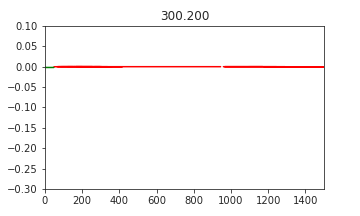
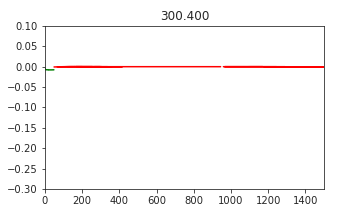
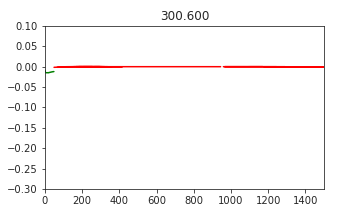
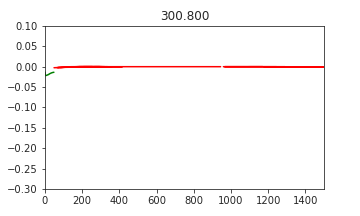
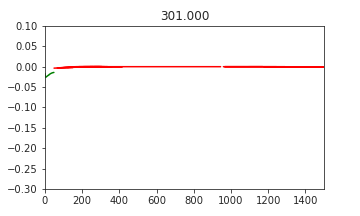
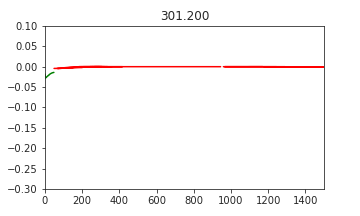
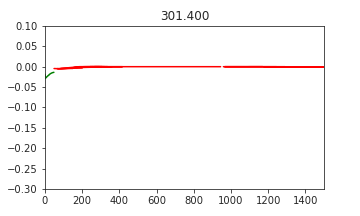
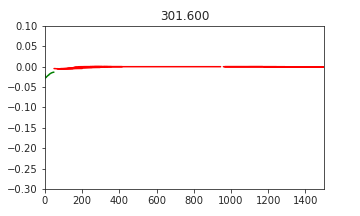
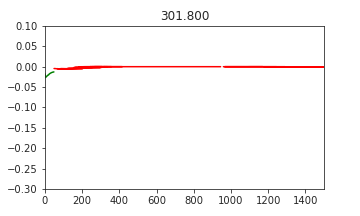
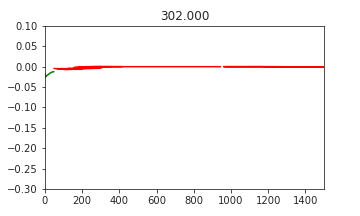
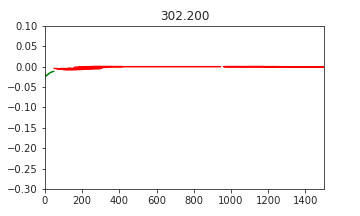
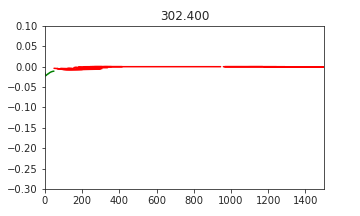
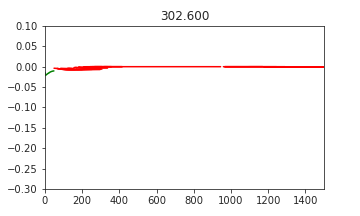
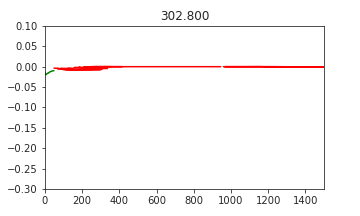
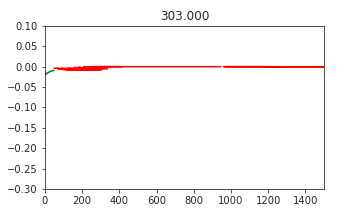
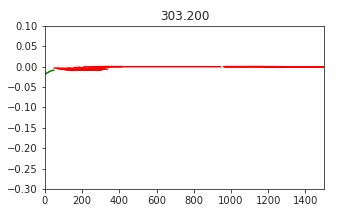
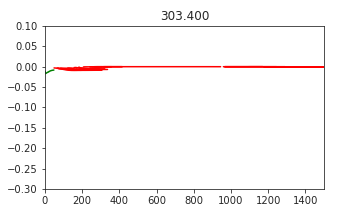
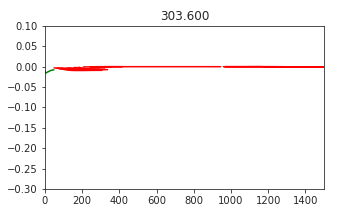
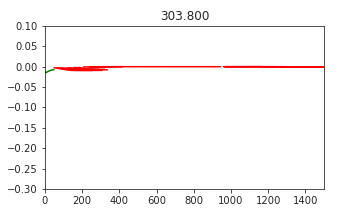
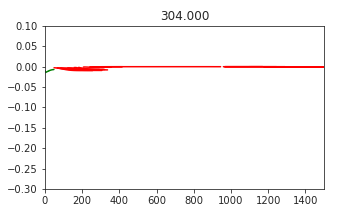
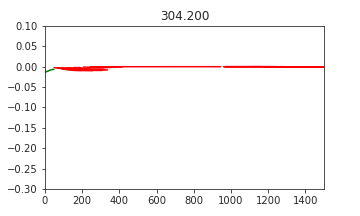
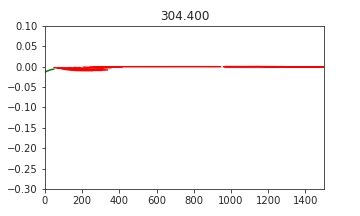
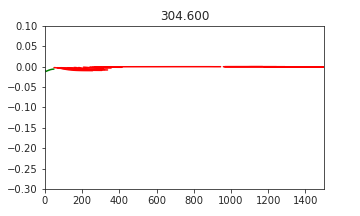
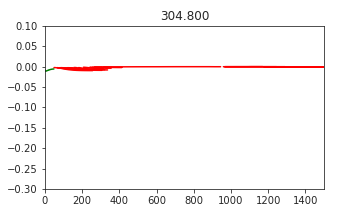
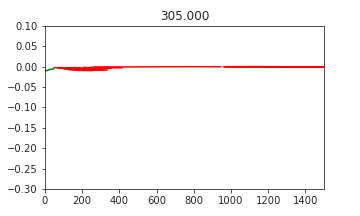
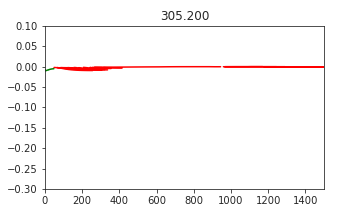
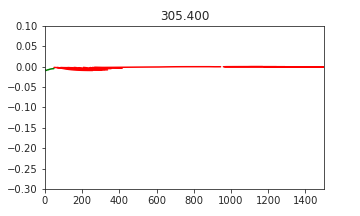
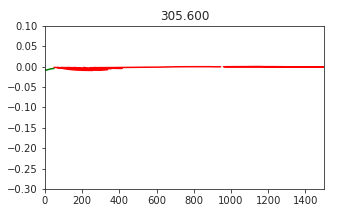
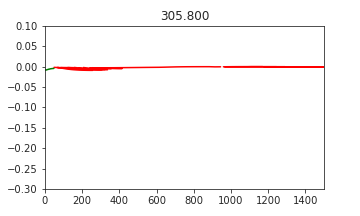
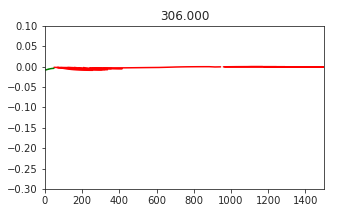
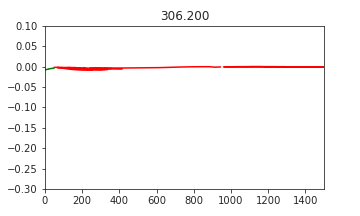
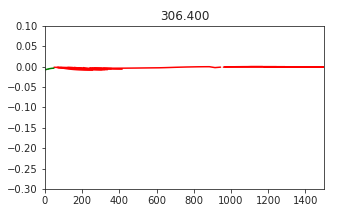
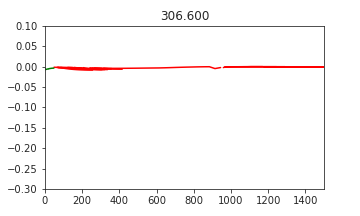
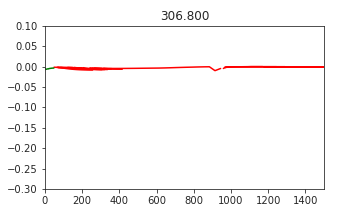
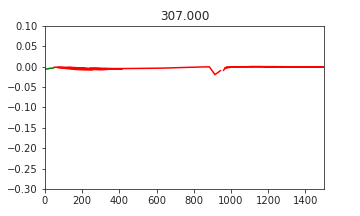
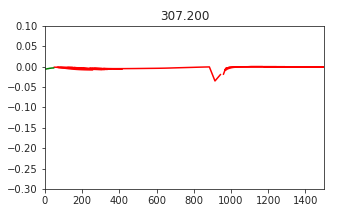
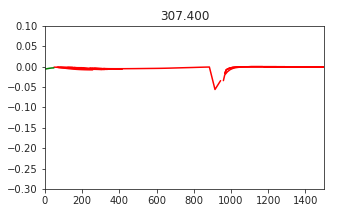
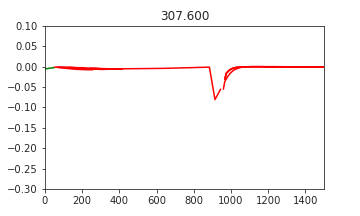
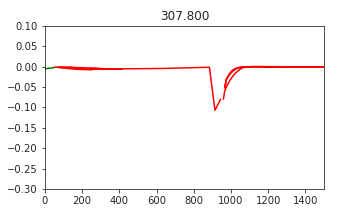
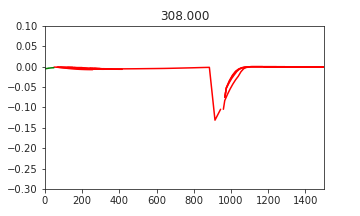
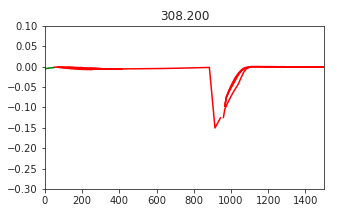
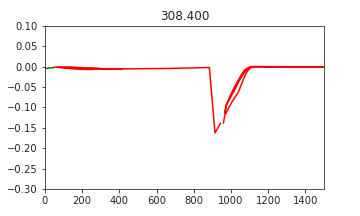
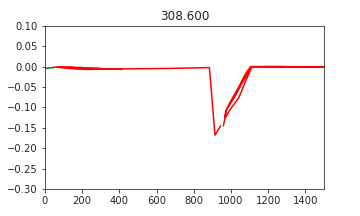
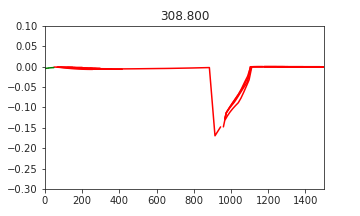
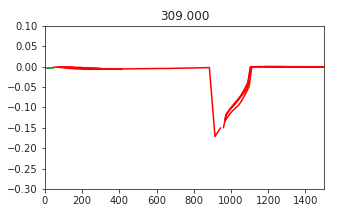
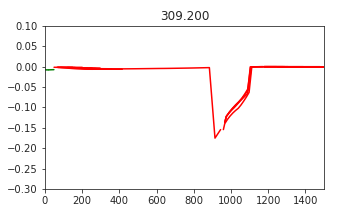
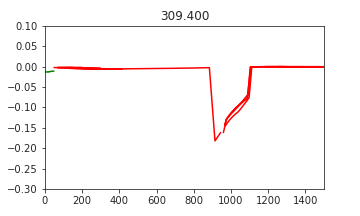
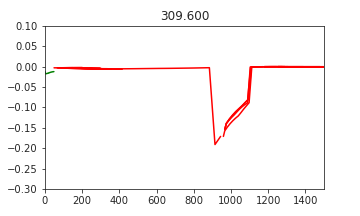
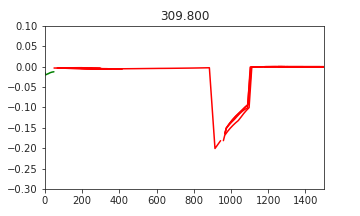
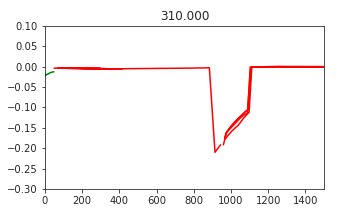
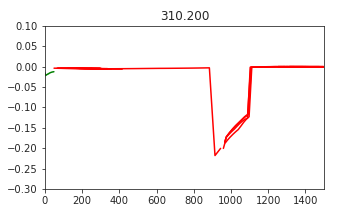
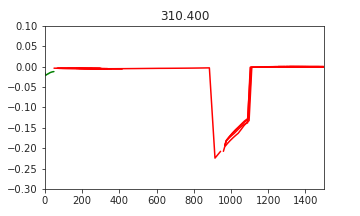
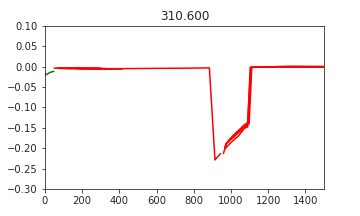
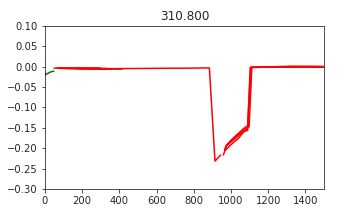
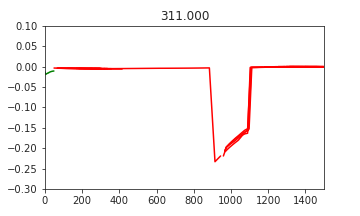
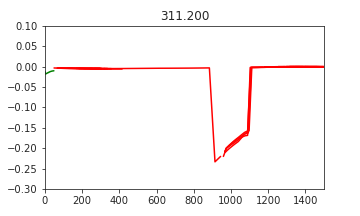
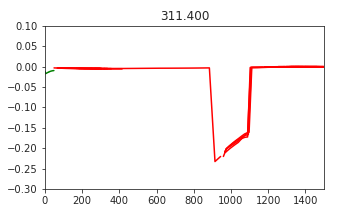
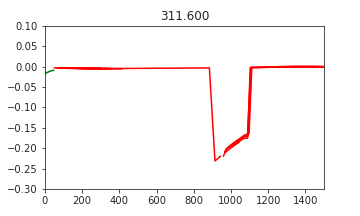
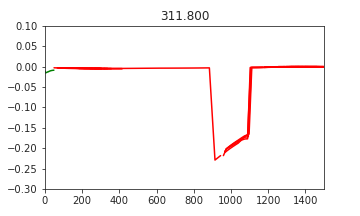
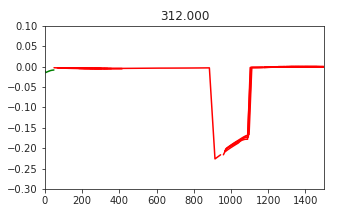
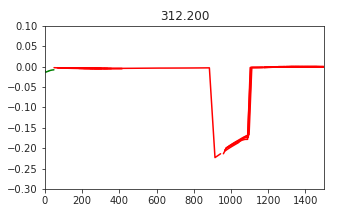
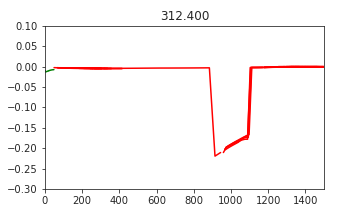
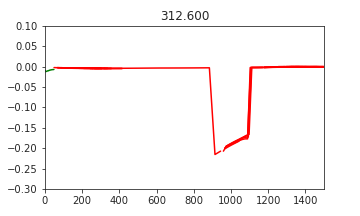
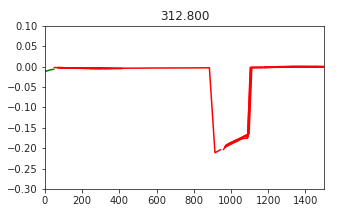
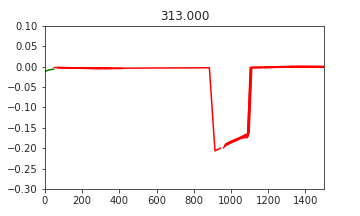
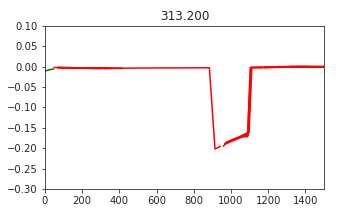
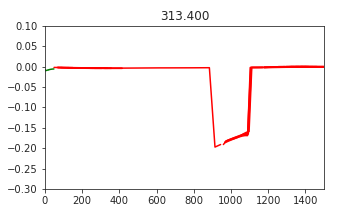
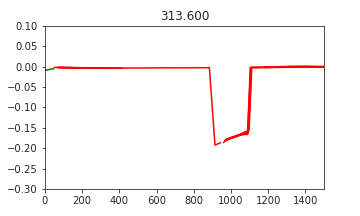
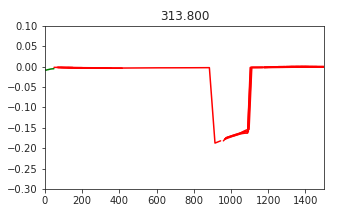
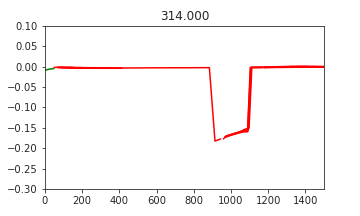
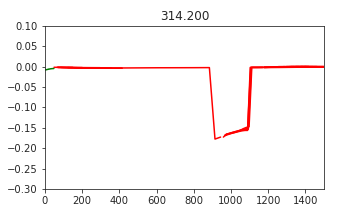
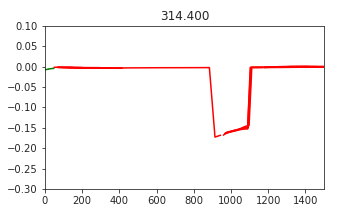
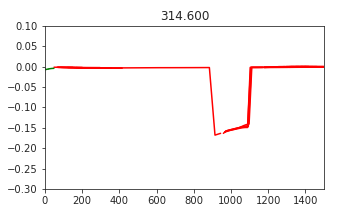
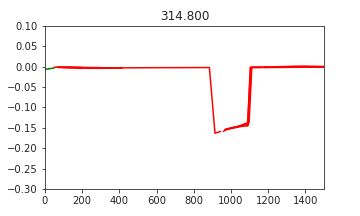
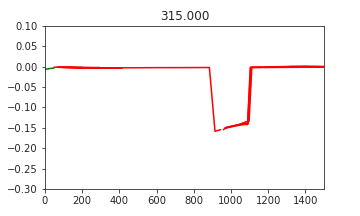
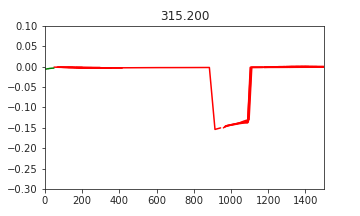
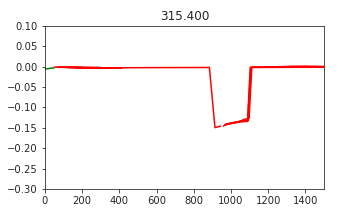
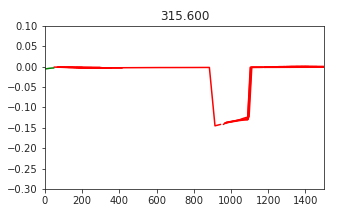
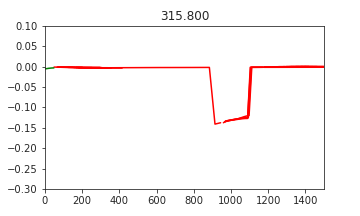
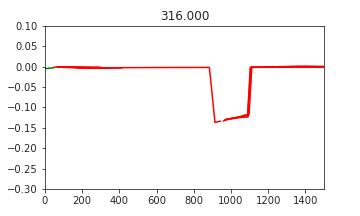
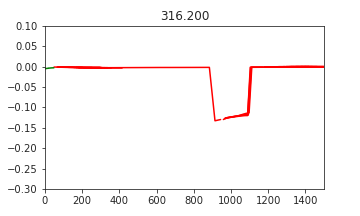
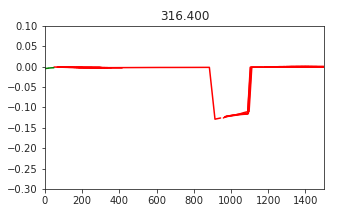
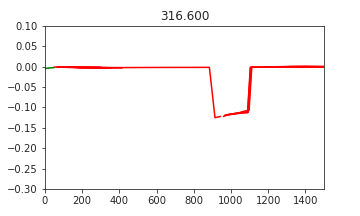
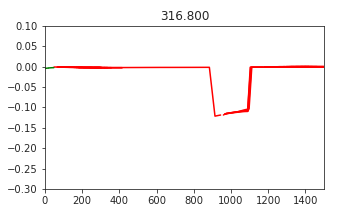
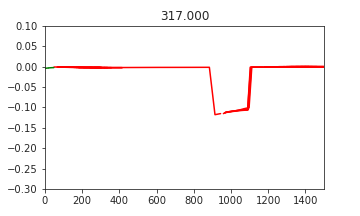
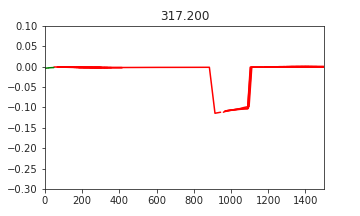
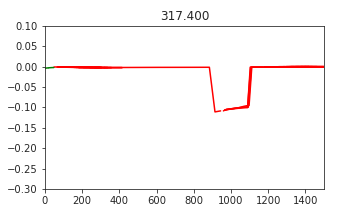
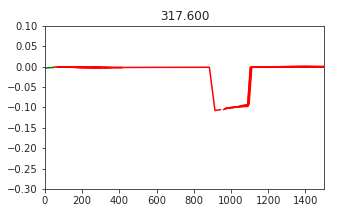
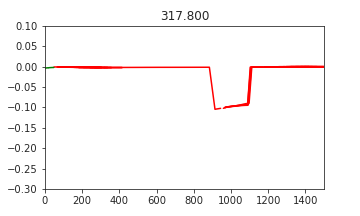
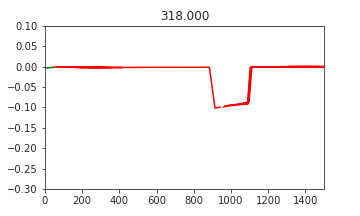
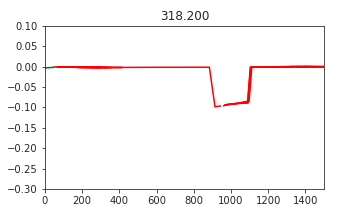
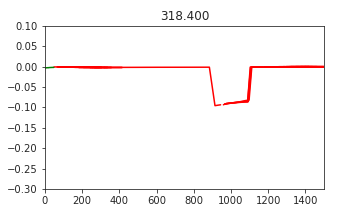
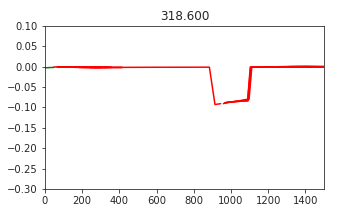
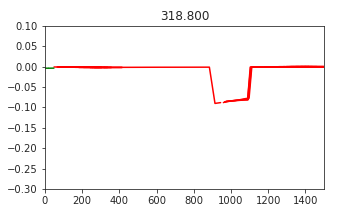
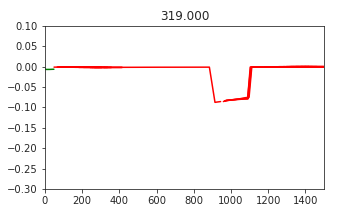
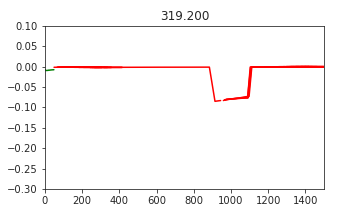
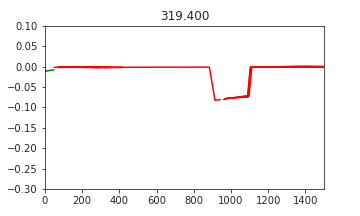
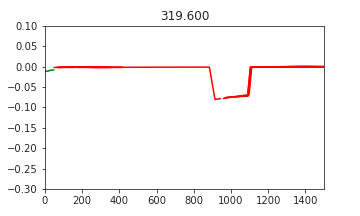
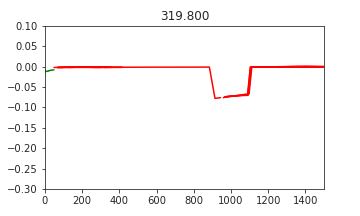
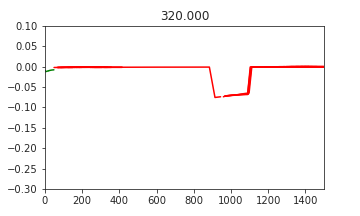
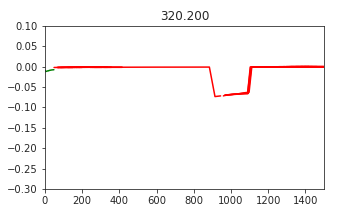
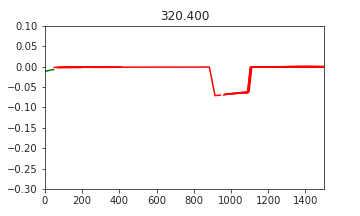
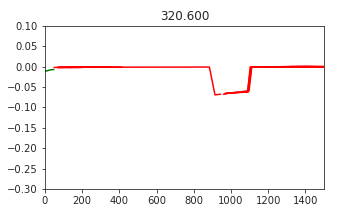
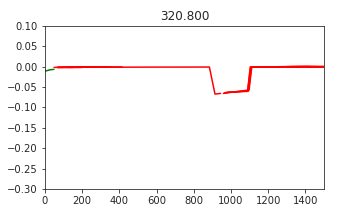
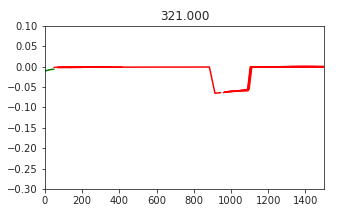
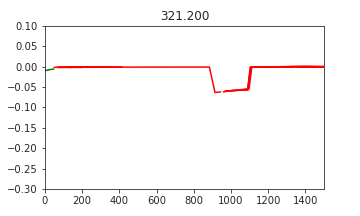
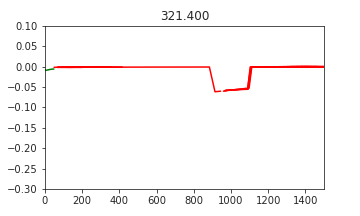
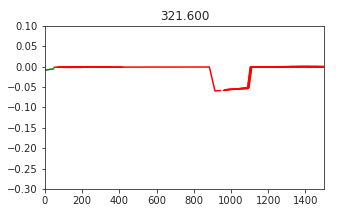
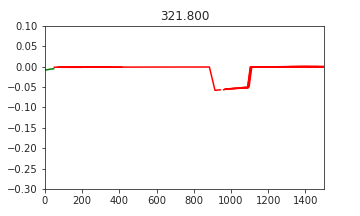
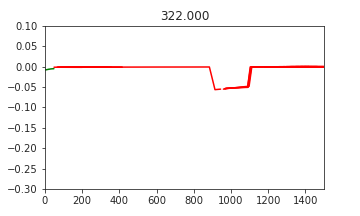
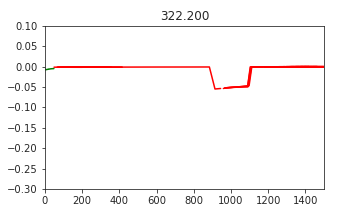
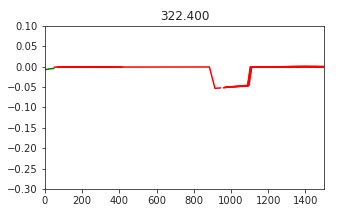
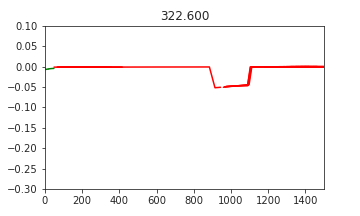
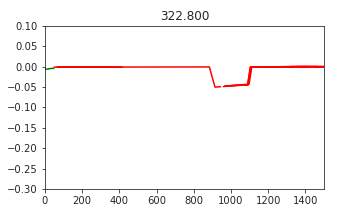
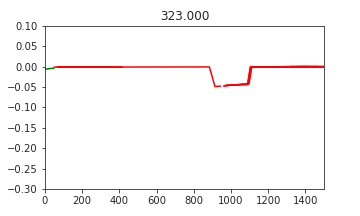
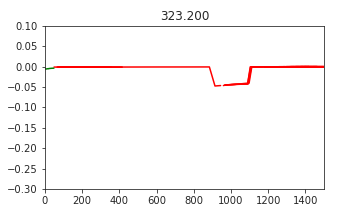
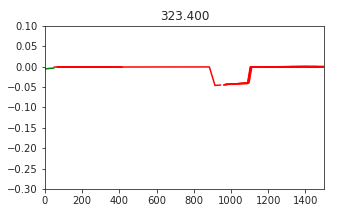
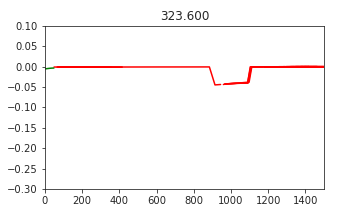
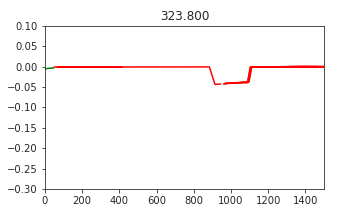
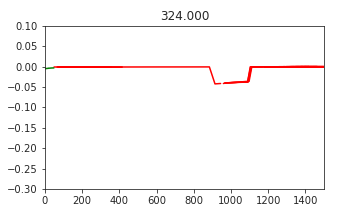
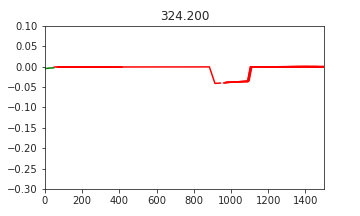
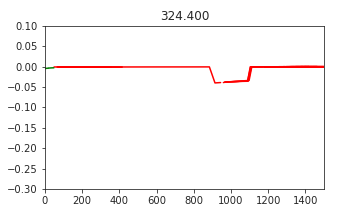
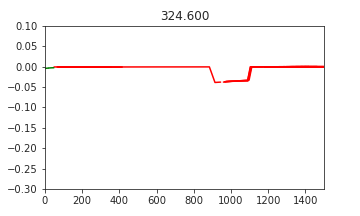
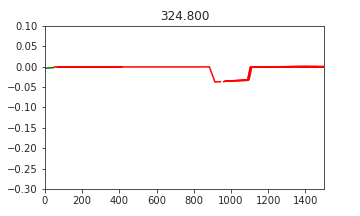
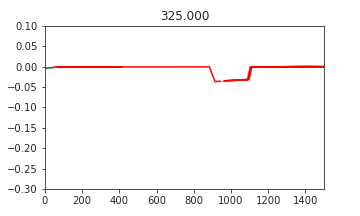
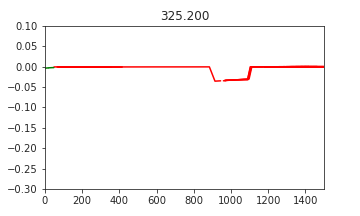
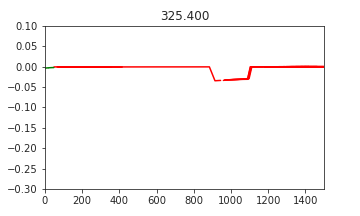
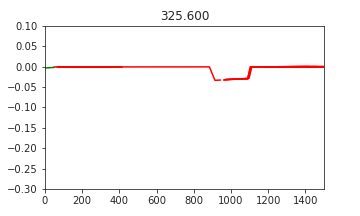
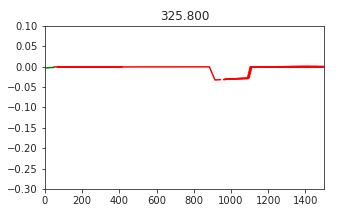
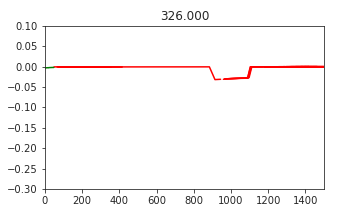
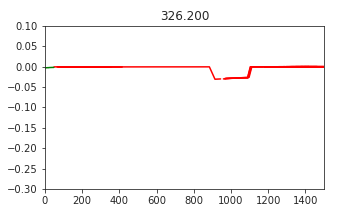
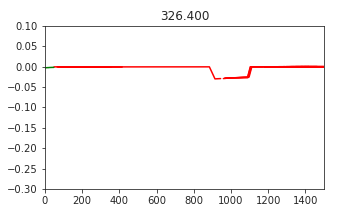
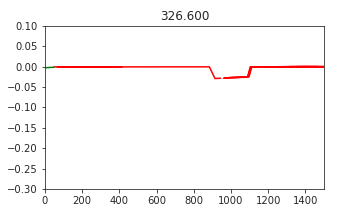
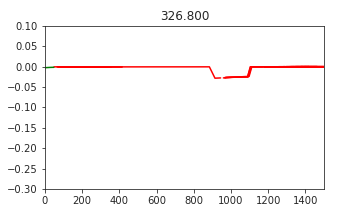
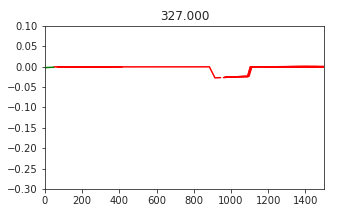
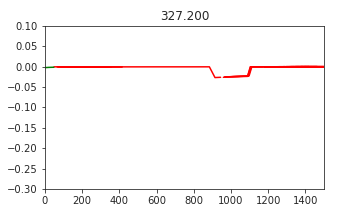
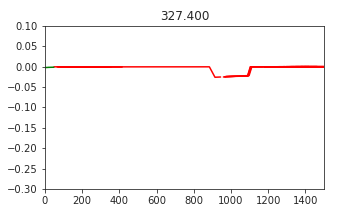
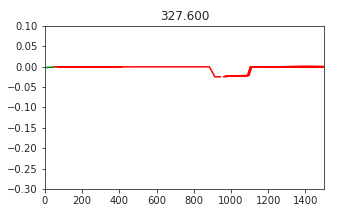
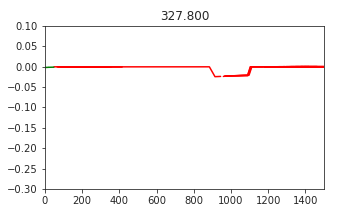
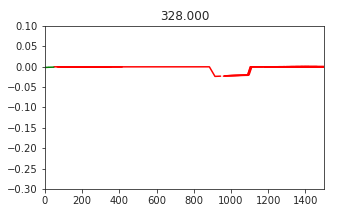
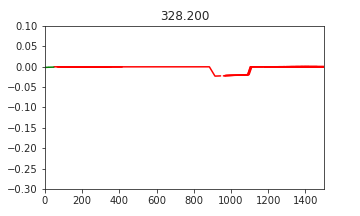
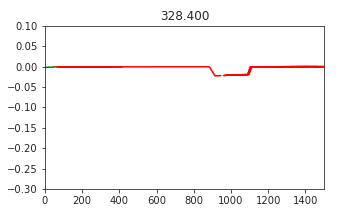
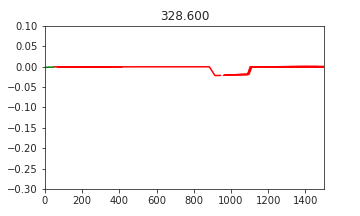
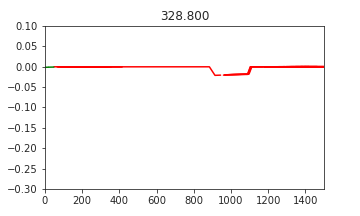
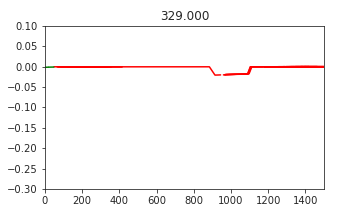
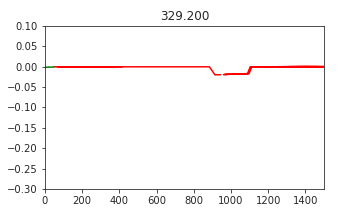
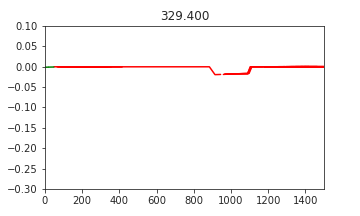
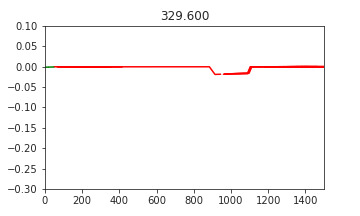
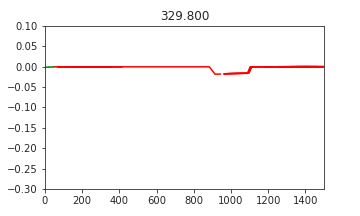
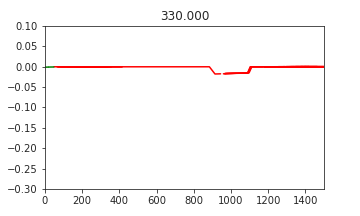
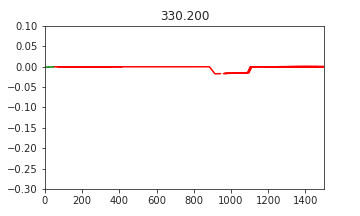
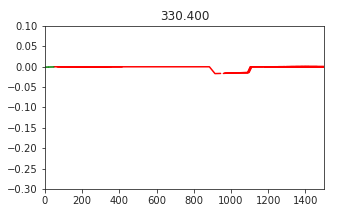
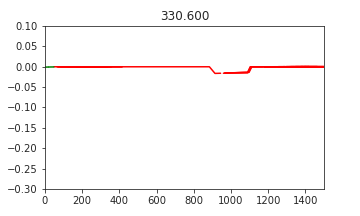
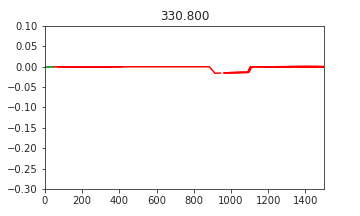
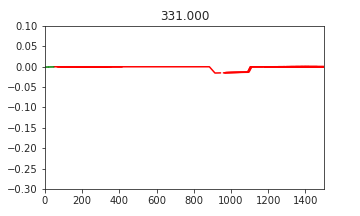
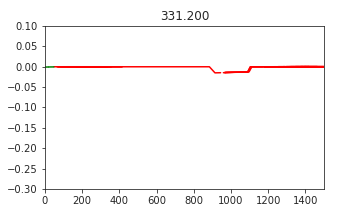
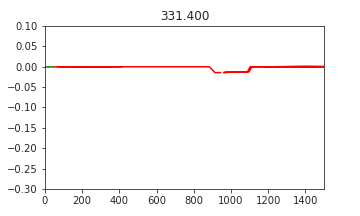
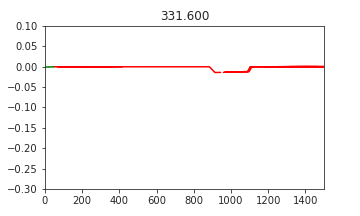
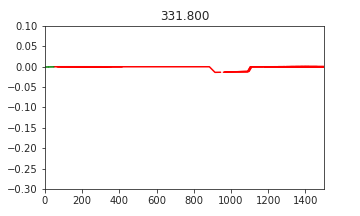
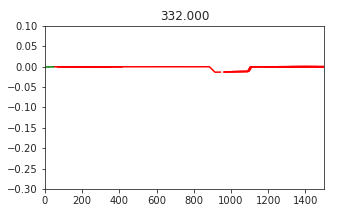
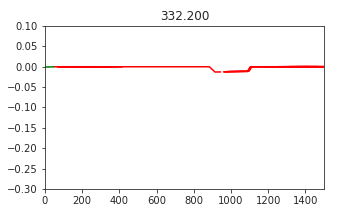
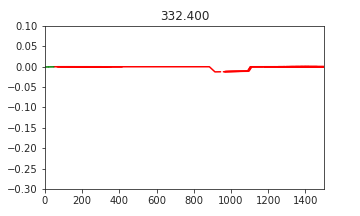
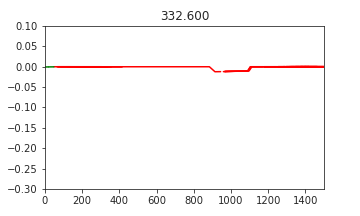
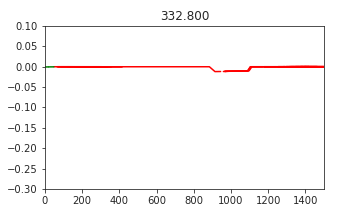
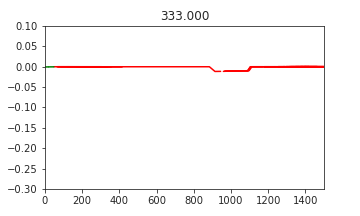
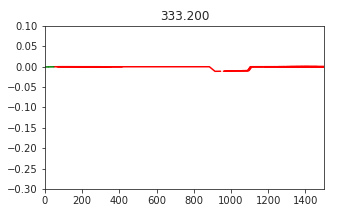
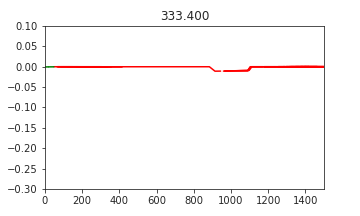
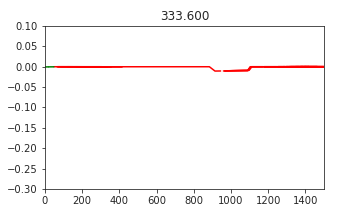
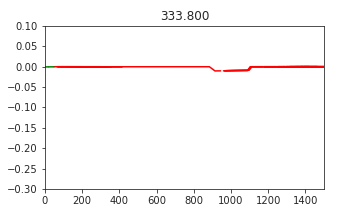
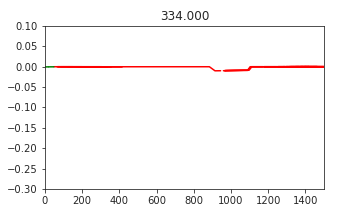
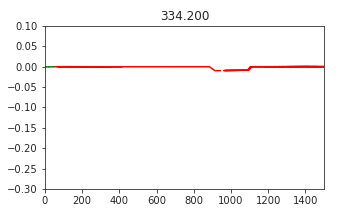
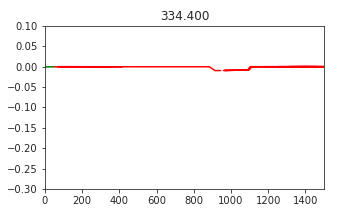
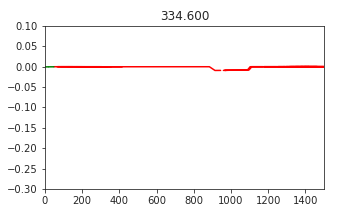
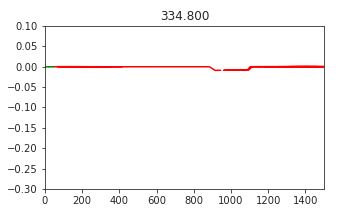
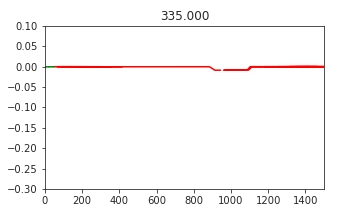
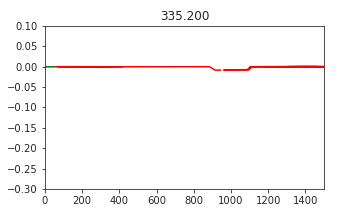
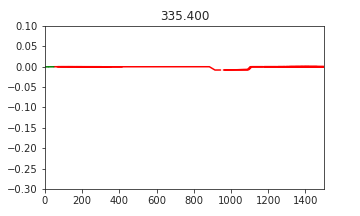
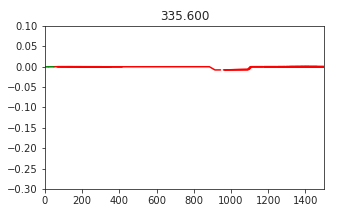
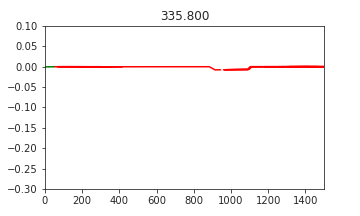
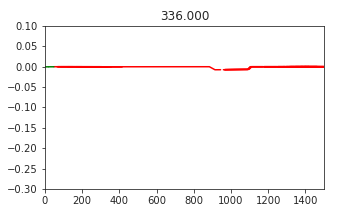
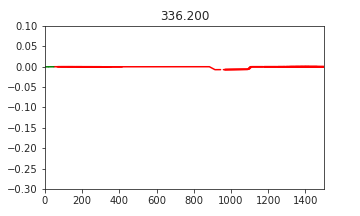
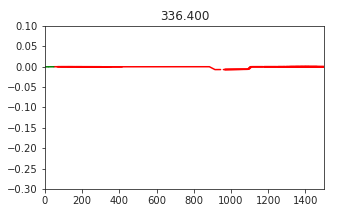
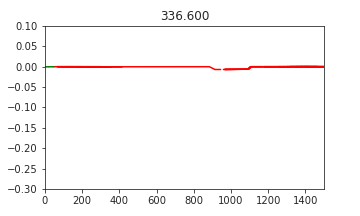
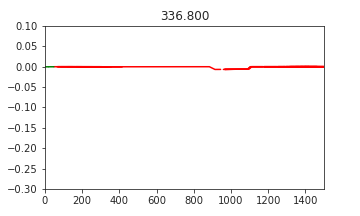
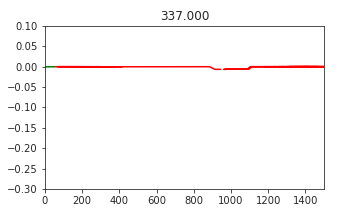
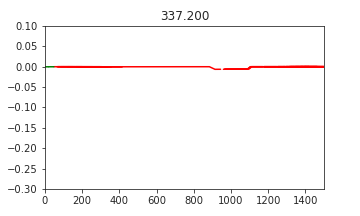
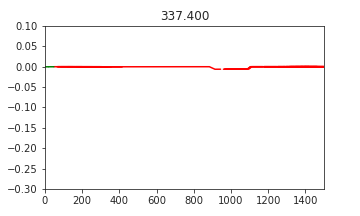
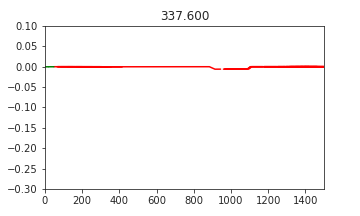
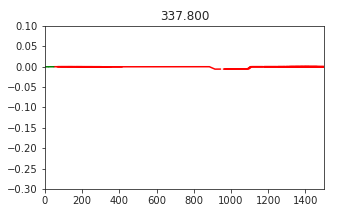
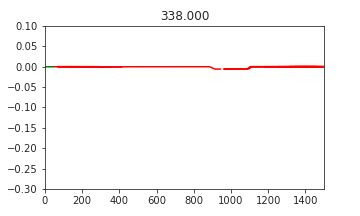
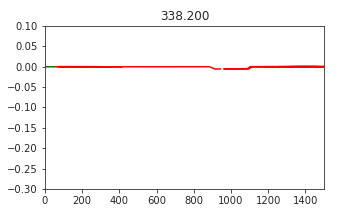
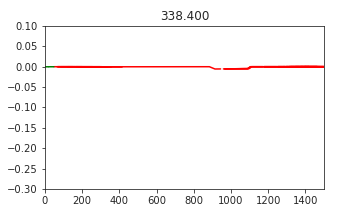
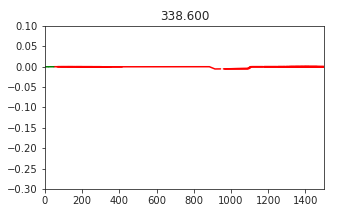
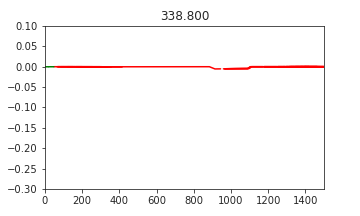
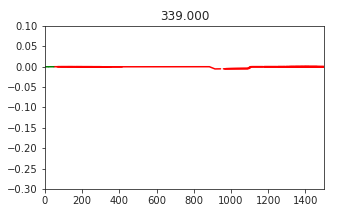
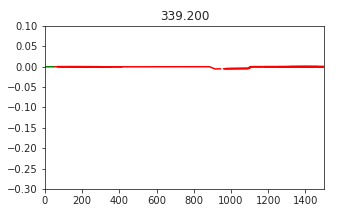
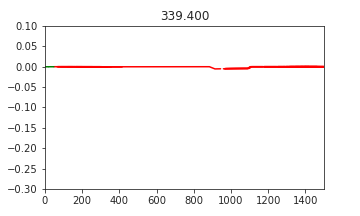
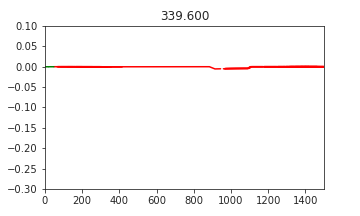
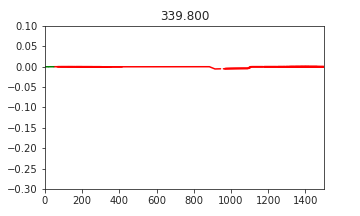
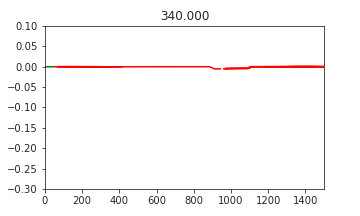
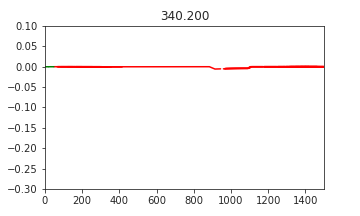
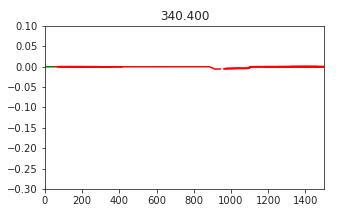
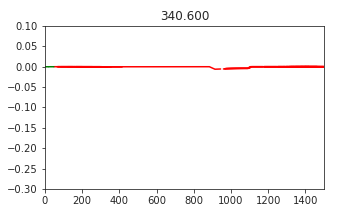
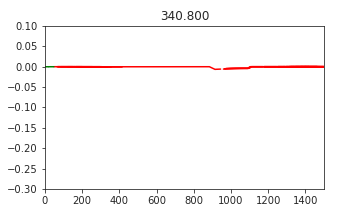
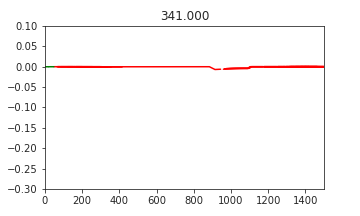
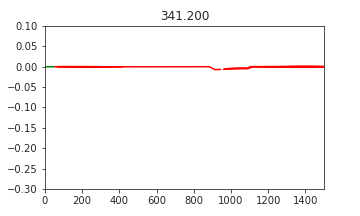
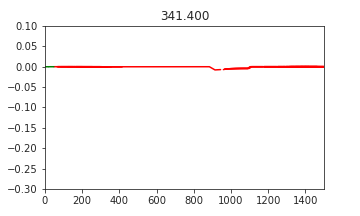
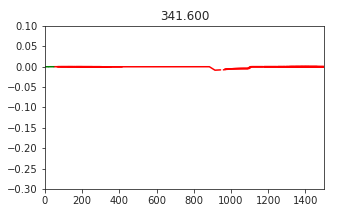
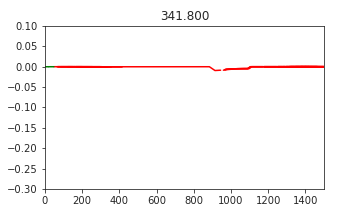
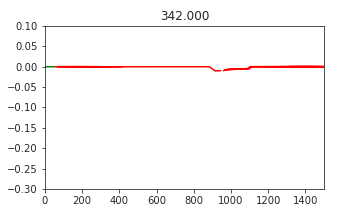
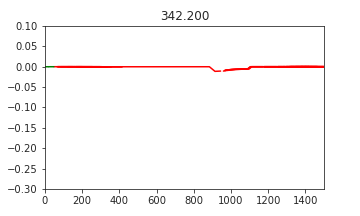
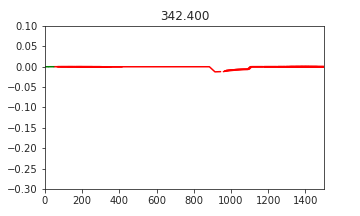
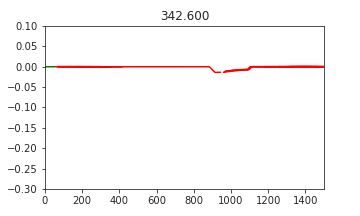
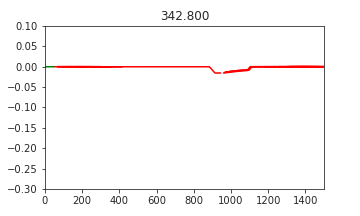
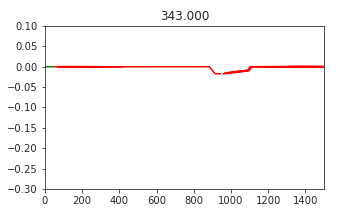
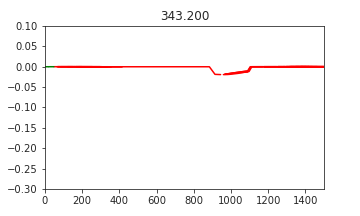
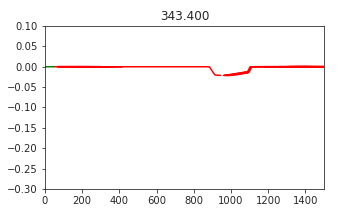
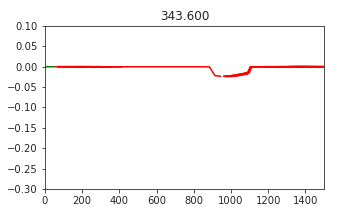
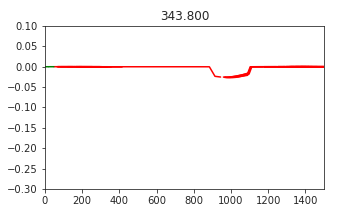
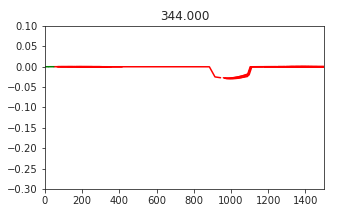
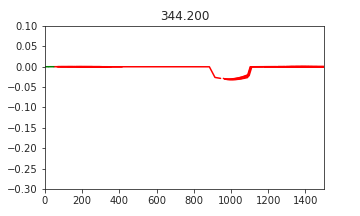
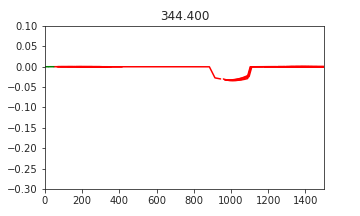
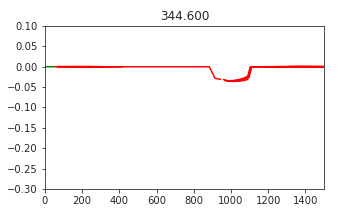
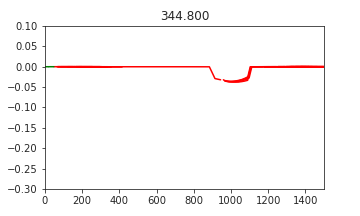
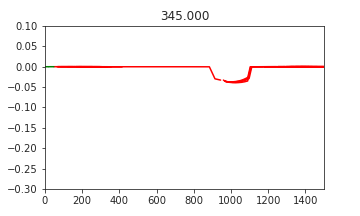
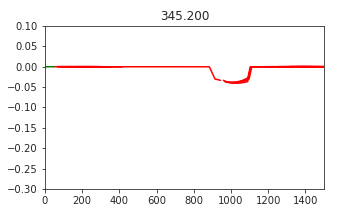
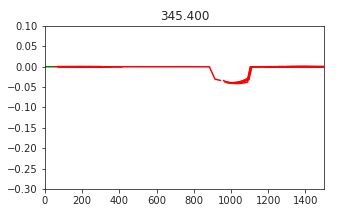
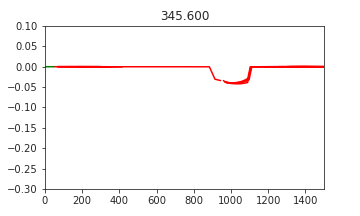
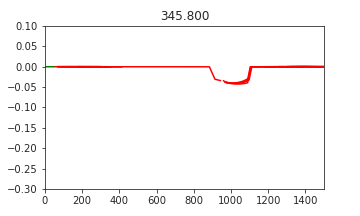
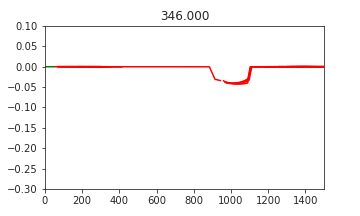
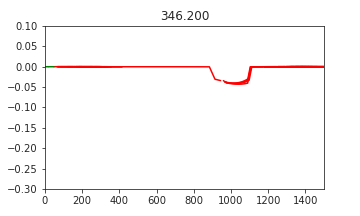
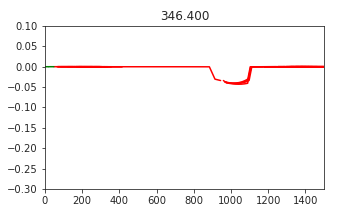
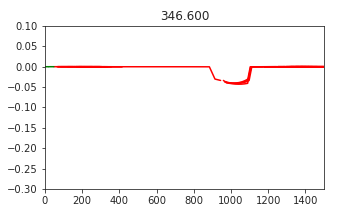
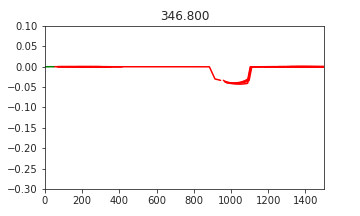
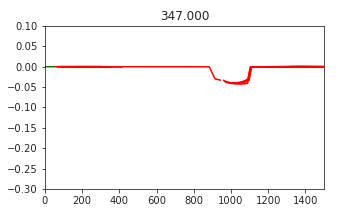
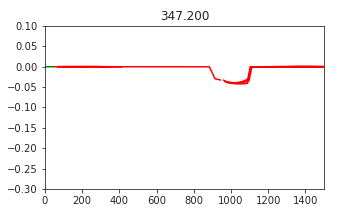
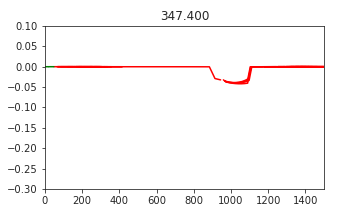
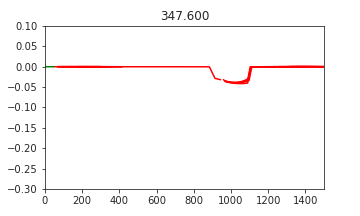
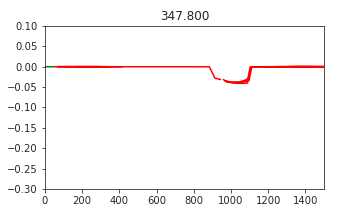
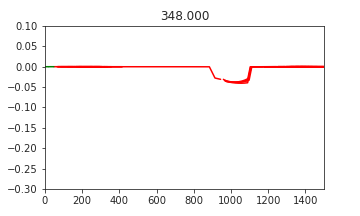
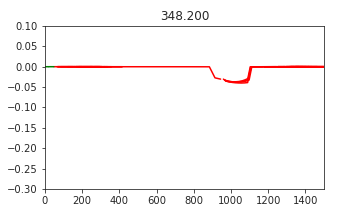
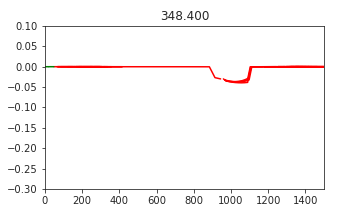
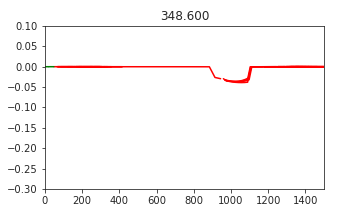
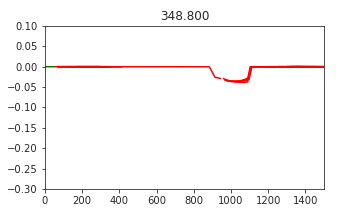
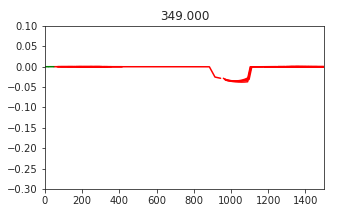
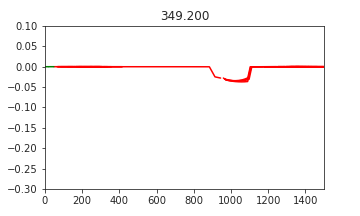
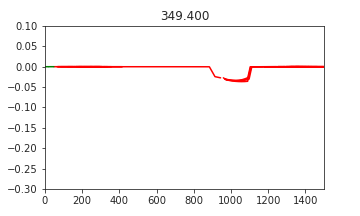
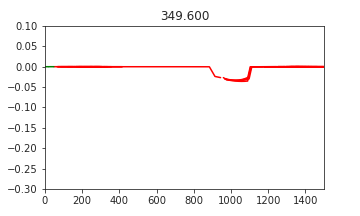
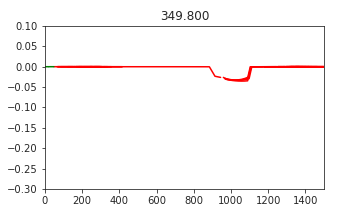

In [ ]:
if not 'burst_trail_ca_current_video' in db.keys():
    cell.record_range_var('Ca_LVAst.ica') # have a look at the mechanisms folder to find available range vars
    I.scp.init_neuron_run(cell_param.sim, vardt=False)
    I.cell_to_animation(cell, \
                        xlim = [0,1500], \
                        ylim = [-0.3, 0.1], \
                        tstart = 295, \
                        tend = 350, \
                        tstep = 0.2, \
                        outdir = db.create_managed_folder('burst_trail_ca_current_video'),\
                        range_vars = 'Ca_LVAst.ica')    
I.display_animation(db['burst_trail_ca_current_video'].join('*', '*png'), embedded = True)

See section [display_animations](#display_animations) for caveats of creating animations


# Step by step: Simulations with well-constrained synaptic input

Here, we place a cell in barrel cortex and compute an anatomical realization, which specifies, where synapses are located. Afterwards, we activate the synapses based on experimental measurements. Next, we import the simulation result in a ModelDataBase to analyze it. Whenever necessary, dask and distributed is used to parallelize the computation.

## Step 1: Register cell morphology in the BC reference frame

From external resources (e.g. the NeuroMorph pipeline), you need a hoc-file with the dendrite morphology you want to place in the barrel cortex model. The coordinates in the hoc morphology file needs to be choosen according to the coordinate system of the barrel cortex model, i.e. the cell should sit at the desired location. 

There is a morphology file in the getting_started/anatomical_constraints subfolder, which is registered such that the cell is in the center of the C2 column. For the following steps, this morphology is used:

In [ ]:
I.os.listdir(I.os.path.join(getting_started_dir, 'anatomical_constraints'))

['86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389',
 '86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center.hoc',
 '86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center.swc',
 '86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_scaled_diameters.hoc']

For building the anatomical model, we use '86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center.hoc', for the simulation of the evoked activity, we need to use the morphology file with scaled apical trunk. Why the scaling is necessary is described [above](#WhyWeNeedScaling).

In [ ]:
path_to_hoc = I.os.path.join(getting_started_dir, 'anatomical_constraints', \
                    '86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center.hoc')
path_to_scaled_hoc = I.os.path.join(getting_started_dir, 'anatomical_constraints', \
                    '86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_scaled_diameters.hoc')

We copy both files to our DataBase. 

In [ ]:
#db = I.DataBase('/home/abast/my_db/')

if not 'anatomical_constraints' in db.keys():
    db.create_managed_folder('anatomical_constraints')
    I.shutil.copy(path_to_hoc, db['anatomical_constraints'])
    I.shutil.copy(path_to_scaled_hoc, db['anatomical_constraints'])

**Sidenote:** The copying step is optional, if we just want to run the simulation. To make the database self-containing (i.e. after copying it to another machine to an arbitrary path, all paths in all parameter files are stil valid and simulations can be rerun immediately), it is required that all files are in a ModelDataBase: In this case, we could use the following path to refer to the hoc file:
`mdb://2017-10-19_3728_uOGyyhY/anatomical_constraints/some_file.hoc`*

In [ ]:
db.get_id()

'2024-01-16_244588_Zcvnuaz'

In [ ]:
import psutil
print(psutil.__version__)
n_cpus = psutil.cpu_count(logical=True) # maybe one less
print(n_cpus)

5.7.2
48


## Step 2: calculate positions of anatomical synapses with respect to the registered morphology

We use the singlecell_input_mapper to create an anatomical model of how that cell is integrated in barrel cortex. The following code calculates the position of synapses onto the example cell. Under the hood, 50 anatomical realizations will be computed. Out of these, the one that is closest to the average is choosen, which then can be refered to as "representative realization". The result is saved in the same folder as the hoc morphology. This takes about 4 hrs to compute, but you can continue with a precomputed result.

In [ ]:
celltype = 'L5tt'
path = db['anatomical_constraints'].join('86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center.hoc')
with I.silence_stdout: # this creates > 1 GB of diagnostic information
    I.map_singlecell_inputs(path, celltype) # this takes some time

FileNotFoundError: [Errno 2] No such file or directory: '/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/getting_started/barrel_cortex/nrCells.csv'

To use the precomputed result, just copy it from the getting started folder to the ModelDataBase:

In [ ]:
from distutils.dir_util import copy_tree
path_to_anatomical_model = I.os.path.join(getting_started_dir, 'anatomical_constraints', \
                    '86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389/')
silent = copy_tree(path_to_anatomical_model, db['anatomical_constraints'])

In [ ]:
# adapt the path, if you have generated a new anatomical model
path_to_anatomical_model = db['anatomical_constraints'].join('86_L5_CDK20041214_nr3L5B_dend_PC_neuron_transform_registered_C2center_synapses_20150504-1611_10389')

**What does the result of the map_singlecell_inputs script look like?**

In the directory generated by the singlecell_input_mapper, there are the following files:

In [ ]:
I.os.listdir(path_to_anatomical_model)

- The most important files are the *.con file and the *.syn. These files are the relevant output of the SingleCellMapper for simulations of evoked activity.

- The  *_summary_*.csv file contains summary statistics about the connectivity between all presynaptic populations and our neuron.

The con file maps between presynaptic cells and synapses:

In [ ]:
con_file_path = I.glob.glob(path_to_anatomical_model.join('*.con'))[0]

In [ ]:
with open(con_file_path) as f:
    print(f.read()[:300])

The .syn file specifies the exact position of each synapse on the hoc morphology:

In [ ]:
syn_file_path = I.glob.glob(path_to_anatomical_model.join('*.syn'))[0]
with open(syn_file_path) as f:
    print(f.read()[:300])

Here, section referes to the ID od the section in the cell object. x specifies, where along that section the synapse is placed. If x is 0, this is the beginning of the section, if x is one, this is the end of the section.

The subfolders in the directory contain Amira landmark files:
 - for the location of presynaptic_somata by celltype in the folder `presynaptic_somata`
 - for the location of synapses in the folders `total_synapses`, `soma_synapses`, `basal_synapses`, `apical_synapses`

**How to parallelize the generation of anatomical models?**

We can use a distributed Cluster:

In [ ]:
I.cluster()

In [ ]:
# make the single cell mapper a delayed function
delayed_map_singlecell_inputs = I.dask.delayed(I.map_singlecell_inputs)
# call it with the morphologies
delayeds = [delayed_map_singlecell_inputs(p, 'L5tt') for p in morphology_paths]
# bundle everything in one delayed object
delayeds = dask.delayed(delayeds) # just do it ...
# compute the result, in this case, all cores on the local machine are used.
futures = I.cluster().compute(delayeds)
# visualize the progress
I.distributed.progress(futures)

**Sidenotes**

I.cluster() returns a distributed.Client object, which can be used to execute a dask graph using all cores on the local machine. I.cluster() also "prepares" the cluster such that it fits the needs of doing single cell simulations: 
- [Work stealing](http://distributed.readthedocs.io/en/latest/work-stealing.html) is disabled, because otherwise, tasks might run more than once. This should change in the near future, [see this github issue](https://github.com/dask/distributed/issues/847). As soon as work-stealing is transactional, just comment out the respective lines in Interface.cluster, which disable work stealing.
- It imports matplotlib on all workers and sets the backend to 'agg'. This can be neccessary on compute servers that do nt provide the necessary graphical libraries, which would crash otherwise. After this, you can create figures on the computeservers.
- If I.cluster() is called more than once, it does not generate a new distributed.Client() object every time. Instead, it creates it when it is first called and returns the same client on all consecutive calls.
- You can set up a "real" cluster spanning hundrets of compute servers as described [here](http://distributed.readthedocs.io/en/latest/setup.html). In this case, you would connect to the cluster in the following way:

In [ ]:
import psutil

print(psutil.cpu_count(logical=True))

In [ ]:
#I.cluster('server_name_on_which_scheduler_is_running:8786')
I.cluster('10.100.2.82:38786')

## Step 3: define synapse activation

Now we need to activate the synapses according to experimental data, such that the synapse activation represents a passive touch experiment.

To do this, we need the following information
 1. A parameter file specifying charakteristics of the synaspses by celltype
 2. A parameterfile specifying the ongoing activity by celltype
 3. Parameterfiles specifying evoked response by stimulus, celltype and celllocation

### Synapse characteristics and ongoing activity
Synapse characteristics and ongoing activity are defined here:

In [ ]:
ongoing_template_param_name = I.os.path.join(getting_started_dir, 'functional_constraints/ongoing_activity/ongoing_activity_celltype_template_exc_conductances_fitted.param')

In this parameter file, the following keys are defined

In [ ]:
ongoing_template_param = I.scp.build_parameters(ongoing_template_param_name)
ongoing_template_param.keys()

The most relevant information is specified in the network key:

In [ ]:
print ongoing_template_param.network.keys()

Here, parameters are defined for each presynaptic celltype:

In [ ]:
ongoing_template_param.network.L5tt

 - interval: mean ongoing interspike interval
 - releaseProb: chance that synapse gets activated if presynaptic cell gets activated
 - synapses --> receptors --> glutamate_syn --> parameter: 
    - parameters for the NEURON mechanism defined here: mechanisms/channels/netglutamate.mod
      - tau1: NMDA decay time
      - tau2: NMDA rise time
      - tau3: AMPA decay time
      - tau4: AMPA rise time
 - synapses --> receptors --> weight
      - maximum conductance of the synapse for AMPA and NMDA, respectively

### PSTHs of evoked activity for passive touch by celltype and celllocation

Parameterfiles can be found here:

In [ ]:
evokedPrefix = I.os.path.join(getting_started_dir, 'functional_constraints/evoked_activity/PW_SuW_RF_CDK/')
excitatory_PSTHs = [fname for fname in I.os.listdir(evokedPrefix) if fname.endswith('PSTH_UpState.param')]
inhibitory_PSTHs = [fname for fname in I.os.listdir(evokedPrefix) if fname.endswith('active_timing_normalized_PW_1.0_SuW_0.5.param')]
excitatory_PSTHs

Let's have a look at a specific parameterfile:

In [ ]:
example_PSTH = I.scp.build_parameters(I.os.path.join(evokedPrefix, excitatory_PSTHs[-5]))
example_PSTH.keys()

We have entries for each homecolumn, each containing the respective evoked PSTH in a C2 stimulus scenario:

In [ ]:
example_PSTH.L5tt_C2.keys()

In [ ]:
for k,v in example_PSTH.L5tt_C2.iteritems():
    print '{}: {}\n'.format(k,v)

### Creating a parameterfile that fully defines a specific stimulus

Next, we combine all data, to one parameterfile, which then contains all information to describe the activatio of presynaptic cells and synapses during a passive whisker touch scenario, given our cellmorphology and the anatomical network realization. To so, we use the `create_evoked_network_parameter` function:

In [ ]:
# the whisker stimulus we want to simulate. 
whisker = 'C2' # Cell is in C2 --> this is a principal whisker stimulus scenario
# defined above
ongoing_template_param_name 
syn_file_path
con_file_path
# cell number spreadsheet generated in anatomical realization step.
cell_number_file_name = path_to_anatomical_model.join('NumberOfConnectedCells.csv')
# output_path
if not 'network_param' in db.keys(): db.create_managed_folder('network_param')
out_file_name = db['network_param'].join('C2_stim.param')
I.create_evoked_network_parameter(ongoing_template_param_name, cell_number_file_name, \
                                  syn_file_path, con_file_path, whisker, out_file_name)

Let's also generate parameterfiles for surround whisker stimuli!

In [ ]:
with I.silence_stdout:
    for whisker in ['B1', 'B2', 'B3', 'C1', 'C3', 'D1', 'D2', 'D3']:
        I.create_evoked_network_parameter(ongoing_template_param_name, cell_number_file_name, \
                                          syn_file_path, con_file_path, whisker,\
                                          db['network_param'].join('{}_stim.param'.format(whisker)))

##### what does the result look like?

In [ ]:
network_param = I.scp.build_parameters(db['network_param'].join('C2_stim.param'))

In [ ]:
network_param.keys()

In [ ]:
print network_param.network.keys()[:10]

We just printed a subset of the keys here. Lets have a look at what the parameterfile specifies about L5tt cells in C2

In [ ]:
for k, v in network_param.network.L5tt_C2.iteritems():
    print '{}: {}\n'.format(k,v)

As you see, all information is integrated

 - network --> [population] --> celltype --> pointcell --> offset: timepoint at which the evoked activity starts 

## Step 4: Determine channel densities such that the cell exhibits certain biophysical properties

Currently, the parameters are determined using a MOO approach. The result is writen manually in the cell parameter file, which we have already seen above.

In [ ]:
# We copy it to the model data base
if not 'biophysical_constraints' in db.keys():
    cell_parameter_file = I.os.path.join(getting_started_dir, 'biophysical_constraints', \
                                     '86_CDK_20041214_BAC_run5_soma_Hay2013_C2center_apic_rec.param')
    I.shutil.copy(cell_parameter_file, db.create_managed_folder('biophysical_constraints'))
cell_parameter_file = db['biophysical_constraints'].join('86_CDK_20041214_BAC_run5_soma_Hay2013_C2center_apic_rec.param')

## Step 5: run the simulation

we simulate one single trail for each whisker stimulus and save the result in the database under the simrun key:

In [ ]:
delayeds = []
if 'simrun' in db.keys(): 
    del db['simrun']
db.create_managed_folder('simrun')
for whisker in ['B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'D3']:
    network_file = db['network_param'].join('{}_stim.param'.format(whisker))
    cell_parameter_file # defined above
    dir_prefix = db['simrun'].join('stim_{}'.format(whisker))
    nSweeps = 1 # number of consecutive simulations per process
    nprocs = 1 # number of processes simulating that task in parallel    
    tStop = 300 # stop the simulation at 300ms
    d = I.simrun_run_new_simulations(cell_parameter_file, network_file, dirPrefix = dir_prefix, \
                                     nSweeps = nSweeps, nprocs = nprocs, tStop = tStop, silent = False)
    delayeds.append(d)

I.simrun_run_new_simulations returns dask.delayed objects, i.e. they result describes *how* the computation can be run, but it is not computed yet. We send it to our local cluster:

In [ ]:
futures = I.cluster().compute(delayeds)

The computation happens in the background and does not block IPython. We can visualize the progress:

In [ ]:
I.distributed.progress(futures)

Now, the simrun folder in the model database contains the simulation results

In [ ]:
I.os.listdir(db['simrun'])

## Step 6: load computation results to a ModelDataBase for further analysis

This gives convenient access to the data using the widely used pandas and dask libraries. It also converts the data to an optimized binary format (msgpack with blosc compression, also the synapse and cell activation data is categorized, i.e. repeated values are replaced by an integer). This gives the following advantages:
  - reduced space on harddisk (25% of original data)
  - fast access (... s to load in the synapse activation of 1000 simulation trails compared to .. It also provides

In [ ]:
I.db_init_simrun_general.init(db, db['simrun'], get = I.cluster().get)

In [ ]:
I.db_init_simrun_general.optimize(db, get = I.cluster().get)

In [ ]:
db.keys()

Now, the following keys are set:
 - mdb['synapse_activation'] activation of synapses for each simulationtrail, type: dask:DataFrame
 - mdb['cell_activation'], activation of presynaptic cells for each simulationtrail, type: dask:DataFrame
 - mdb['voltage_traces'], soma voltage traces, type: dask:DataFrame
 - mdb['spike_times'], spike times, type: pandas.DataFrame
 - mdb['dendritic_recordings'], voltage traces on the dendrite as specified in the cell parameter file, type: ModelDataBase containing a seperate dask.DataFrame for every recording location
 - mdb['metadata'], original filenames, type: pandas.DataFrame
 - mdb['parameterfiles'], mapping between simulation trial and used parameterfiles, type: pandas.DataFrame
 - mdb['parameterfiles_cell_folder'], folder containing the cell parametefiles, type: ManagedFolder
 - mdb['parameterfiles_network_folder'], folder containing the network parameterfiles, type: ManagedFolder
 - mdb['sim_trail_index'], all simulation trials, type: pandas.Series
 - mdb['simresult_path'], original path from which the simulation has been loaded, type: str

Let's have a look at the synapse activation data frame:

In [ ]:
db['synapse_activation']

This is a dask dataframe object, which points to the actual data which is stored in the database using the msgpack binary format. The data is split up into chunks of reasonable file size. At this timepoint, no data has been loaded. We can view the first 2 of the dataset, which only loads the first chunk of data:

In [ ]:
db['synapse_activation'].head(2)

We can select data using the index:

In [ ]:
db['synapse_activation'].loc['stim_B1/results/20171113-1614_seed1467457903/000000']

This returns a dask dataframe again, i.e. the query is not computed yet. To do this, call compute:

In [ ]:
# this prints out a table containing all synapse activations during the specified trail
db['synapse_activation'].loc['stim_B1/results/20171113-1614_seed1467457903/000000'].compute()

What is the average distance of synapses from the soma by celltype?

In [ ]:
# load dask dataframe
sa = db['synapse_activation']
# assign a new column: the celltype is the first part of the synapse_type column
sa['celltype'] = sa.map_partitions(lambda x: x.synapse_type.str.split('_').str[0])
# groupb by this value, compute the mean soma distance in each group, compute the result on the cluster
sa.groupby('celltype').apply(lambda x: x.soma_distance.mean()).compute(scheduler=I.cluster().get)

It is easy to create an animation of a simulation trail from the database:

In [ ]:
if not 'D3_stim_animation' in db.keys():
    cell = I.simrun_simtrail_to_cell_object(db, 'stim_D3/results/20171113-1614_seed919944399/000000')        
    I.cell_to_animation(cell, \
                        xlim = [0,1500], \
                        ylim = [-90, 50], \
                        tstart = 245-25, \
                        tend = 245+25, \
                        tstep = 0.2, \
                        outdir = db.create_managed_folder('D3_stim_animation'))
I.display_animation(db['D3_stim_animation'].join('*', '*png'), embedded = True)

## Beyond toy examples: examplary analysis using a ModelDataBase containing 18000 trials

In [ ]:
import Interface as I

In [ ]:
# database containing all simulationtrails for the L6 paper (18000)
db_robert = I.DataBase('/nas1/Data_arco/results/db_robert_3x3/')

In [ ]:
import time

##### Plot the PSTH

In [ ]:
st = db_robert['spike_times']
st.head(2)

In [ ]:
st['stim'] = st.index.str.split('_').str[0]

In [ ]:
t = time.time()
fig = I.plt.figure(figsize = (6,4))
bins = st.groupby('stim').apply(I.temporal_binning)
for i,v in bins.iteritems(): I.histogram(v, fig = fig, label = i)
fig.axes[-1].set_xlabel('t in ms')
fig.axes[-1].set_ylabel('# spikes per trail per ms')
fig.axes[-1].legend()
fig.axes[-1].set_xlim([240, 280])
print 'elapsed time: {}'.format(time.time()-t)
fig

##### How many trails have a spike in the interval 245ms to 265 ms?

In [ ]:
# here is what the spike times dataframe looks like
st = db_robert['spike_times']
st.head()

In [ ]:
# pandas provides a powerful syntax to calculate the number of trails exhibiting a spike in the interval 245ms to 265ms.
t = time.time()
dummy = st.apply(lambda x: ((x >= 245) & (x < 265)).any(), axis = 1).value_counts()
print 'elapsed time: {}'.format(time.time()-t)
dummy

In [ ]:
# do the same, but per stimulus
t = time.time()
fun = lambda st: st.apply(lambda x: ((x >= 245) & (x < 265)).any(), axis = 1).value_counts()
dummy = st.groupby('stim').apply(fun)
print 'elapsed time: {}'.format(time.time()-t)
dummy

##### plot all 18000 soma voltage traces in one plot

In [ ]:
db_robert.settings.multiprocessing_scheduler = I.cluster('rall:8786') # should be deprecated

In [ ]:
t = time.time()
fig = I.plt.figure(figsize = (15,3))
# parallelized plotting     
I.manylines(db_robert['voltage_traces'], fig = fig.add_subplot(111), axis = [0, 300, -100, 50], \
            get = I.cluster('rall:8786').get) 
print 'elapsed time: {}'.format(time.time()-t)
fig

#### plot average and std of soma membrane potential

In [ ]:
#real runtime: around 1 minute, much faster here because data is already in the memory of the cluster
mean = I.cluster('rall:8786').compute(db_robert['voltage_traces'].values.mean(axis = 0))
I.distributed.progress(mean)

In [ ]:
# real runtime: around 1 minute, much faster here because data is already in the memory of the cluster
std = I.cluster('rall:8786').compute(db_robert['voltage_traces'].values.std(axis = 0))
I.distributed.progress(std)

In [ ]:
mean = mean.result()
std = std.result()

In [ ]:
I.sns.set_style('ticks')
fig = I.plt.figure(figsize = (9,4))
ax = fig.add_subplot(111)
t = db_robert['voltage_traces'].columns
plot = ax.plot(t, mean, zorder = 3, color = 'k')
ax.plot(t, mean+std, zorder = 3, linewidth = 0.3, alpha = 0.3)
ax.plot(t, mean-std, zorder = 3, linewidth = 0.3, alpha = 0.3)
ax.fill_between(t, mean+std, mean-std, zorder=2, alpha = 0.2, linewidth=0.0, color = 'blue')
I.sns.despine()
fig

# ModelDataBase: API
<a id='ModelDataBase'></a>

This section documents the API of the ModelDataBase class

To create a ModelDataBase, call the ModelDataBase oject with the path, where it is supposed to save it's files.

In [ ]:
db = I.DataBase('/home/abast/my_db/')

### store data

We can use the mdb object like a dictionary. However, all data will be instantly saved to / loaded from disk:

In [ ]:
db['something'] = 'some text i want to save'
db['something']

By default, the ModelDataBase uses cloudpickle to store data on disk. While this allows to store arbitrary python objects, it is not well suited for large datasets. For these cases, you can choose different methods to store the data:

 - **I.dumper_to_pickle**: this uses cPickle to serialize aribtrary python objects. While this is faster than cloudpickle, it only works for a much more limited set of python objects compared to cloudpickle.
 - **I.dumper_pandas_to_pickle**: saves a pandas dataframe using pandas [to_pickle](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_pickle.html) method.
 - **I.dumper_pandas_to_msgpack**: saves a pandas dataframe using pandas [to_msgpack](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_msgpack.html) method with blosc compression. This usually provides the best performance.
 - **I.dumper_dask_to_csv **: saves a dask dataframe to csv. Each partition is stored as csv file using the pands [to_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html) method. If the dataframe has more than 10000 partitions, it is repartitioned to 5000 partitions (i.e. the data is saved with not more than 10000 chunks). Metadata (dtypes, column names, ...) is stored seperately.
 - **I.dumper_dask_to_msgpack**: saves dask dataframe to msgpack. Each partition is stored as csv file using the pandas [to_msgpack](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_msgpack.html) method with blosc compression. If the dataframe has more than 10000 partitions, it is repartitioned to 5000 partitions (i.e. the data is saved with not more than 10000 chunks).
 - **I.dumper_dask_to_categorized_msgpack**: This method is similar to I.dumper_dask_to_msgpack, however, before storing the data, it is preprocessed: All columns of dtype 'object' (i.e. the all columns containing strings including the index) are categorized, which means, repeated occurences of the same string value are replaced by integer values. This allows to compress dataframes containing lots of repeated string values much better.
 - **I.dumper_numpy_to_npy**: This method can be used to store numpy arrays.
 - **I.dumper_cell**: this saves a single_cell_parser.Cell object by first replacing all neuron.Vector instances with numpy.array and afterwards using pickle to save it to disk. 
 - **'self'**: save objects directly to the backend sqlite database. Don't use it for large objects, since writing to the database blocks it for other processes.



To specify a dumper, the syntax mdb['someting'] = ... is not powerfull enough. Use mdb.setitem instead:

In [ ]:
# this is the same as db['something'] = 'some text i want to save'
db.setitem('something', 'some text i want to save', dumper = I.dumper_to_cloudpickle) 

### delete items
To delete items, you can use

In [ ]:
del db['something']

If you overwrite an existing key, the folder where the old data has been saved is removed automatically.

### metadata and integration with git version management

The model data base also stores metadata for each item about the time and exact `in_silico_framework` version used at creation time. You can access metadata of *something* in the following way:

In [ ]:
db.metadata['something']

The most relevant parts here are:
    - dumper: the method how the data was saved in the database
    - time: Timepoint (UTC) when the data was added
    - version: version of the in_silico_framework repository at the timepoint the data was added
    - dirty: whether there where uncommited changes at the timepoint the data was added

You can access the code that was used at the time the data was saved in the model data base. Use the short hash, which starts in 'version' directly after the 'g' and type into your browser:
https://github.com/abast/in_silico_framework/tree/8d54a85

Alternatively, use the full revision id:
https://github.com/abast/in_silico_framework/tree/[full_revisionid]

### How ModelDataBase works internally

If we put data in the database, a subdirectory is created. The foldername is the key (reduced to characters supported by the file system) plus some random suffix.

In [ ]:
print I.os.listdir(db.basedir)

Then, the dumper is called with the data and the path to that subfolder. It saves the data in the subfolder together with a Loader.pickle file. The Loader.pickle file contains an object, which is defined in the same module as the dumper. The Loader-object contains all information necessary to load in the data. It provides a get-method. Then, the key is saved in the sqlite database, together with the name of the subfolder. Metadata is saved accordingly.

To load the data, the foldername is requested from the sqlite database. Afterwards, the Loader.pickle file is loaded and the get-method is called with the absolute path to the respective subfolder. If the database is moved from one location to another, the absolute path is automatically adapted, i.e. the ModelDataBase object takes care of it, while the get method may rely on absolute paths.

Reading and writing to sqlite is handled by the class _sql_backend. Since the locking mechanism of sqlite is not safe on nfs mounts, an additional file based locking mechanism has been implemented (therefore, we need the fasteners module). Currently, we only allow sequential reading and writing. If the model data base is used on a large cluster, this does not have a substantial impact on the overall performance, as long as the access time to the database per process is small. Since all dumpers listed above (except 'self') only write a small amount of data to sqlite (i.e. the key and the subfolder), this does not impact performance: Reading and writing the actual data can happen concurrently.

Using  dumper = 'self' is discouraged, if fast concurrent access to the database is required. Reason: A process, that reads from the sqlite database, blocks other processes, trying to access the same database. Usually, the sqldatabase just contains a  path to a subfolder, i.e. the database is only blocked for a short time. In contrast, the dumper 'self' stores the python object in the sqlite database itself, which can take a long time.

Currently, sqlite is not used directly, instead the module tuplecloudsqlitedict is used. Opposite to sqlite, this is thread-safe. Also, it allows to save python objects directly to the sqlite database (this is, what enables dumper = 'self'). 

Todo: Get rid of tuplecloudsqlitedict

### Not documented yet:
    - model_data_base_register
    - get_id()
    - mdb://[unique_id]/path
    - create sub_mdb
    - create managed folder
    - maybe_calculate

### model data base in more detail

We can use the mdb like a dictionary. However, all data will be instantly saved to / loaded from disk:

In [ ]:
db['something'] = 'some text i want to save'

In [ ]:
db['something']

The model data base also stores metadata for each item, which is tightly integrated with the git version control:

In [ ]:
db.metadata['something']

# Appendix

## Creating videos using I.display_animation

<a id='display_animations'></a>
**CAVEAT** if you use display_animation with embedded = False, you should use relative paths. The reason is, that the paths are not resolved by IPython but by the browser. Therefore they should be stored in the same folder as the IPython notebook

**CAVEAT** if you use embedded = True, all the image data will be saved in the ipynb-file / html-file directly using base64 encoding. While it is nice to have everything in one file, this is less memory efficient. Very quickly you end up with very large notebooks. Sometimes, jupyter seems to have difficulties to handle such files. If you use a version control system for the ipynb-files, this will slow down performance.

I usually use embedded = False during development and embedded = True to send the notebook around.

**Troubleshooting** Because of a matplotlib bug, the exact posistion of the tick labels is not constant, instead they are "jumping around". Use I.sns.set_style("darkgrid") to get rid of that.

## Automatically backup ipython notebook whenever it is saved:
You can configure jupyter to automatically backup your work by prepending the following code to the file ~/.jupyter/jupyter_notebook_config.py (or your respective configuration file) as described here: https://towardsdatascience.com/version-control-for-jupyter-notebook-3e6cef13392d # seen: 20180302

In [ ]:
import os
from subprocess import check_call
from shutil import copyfile
import datetime


def post_save(model, os_path, contents_manager):
    """post-save hook for converting notebooks to .py scripts"""
    # this is taken from here:
    # https://towardsdatascience.com/version-control-for-jupyter-notebook-3e6cef13392d
    # it is modified to save the file in subfolders with a suffix indicating time and date
    if model['type'] != 'notebook':
        return # only do this for notebooks
    d, fname = os.path.split(os_path)
    name_without_extension = fname.split('.')[0]
    check_call(['jupyter', 'nbconvert', '--to', 'script', fname], cwd=d)
    check_call(['jupyter', 'nbconvert', '--to', 'html', fname], cwd=d)
    backup_dir = os.path.join(d, name_without_extension + '_backup')
    try: # post_save hook is also called on creation, apparently sometimes before the file exists
        datestring = datetime.datetime.utcnow().strftime("%Y-%m-%d_UTC%H-%M-%S")
        if not os.path.exists(backup_dir):
            os.makedirs(backup_dir)
        copyfile(os.path.join(d, name_without_extension + '.html'), \
                 os.path.join(backup_dir, name_without_extension + '_' + datestring + '.html'))
        copyfile(os.path.join(d, name_without_extension + '.py'), \
                 os.path.join(backup_dir, name_without_extension + '_' + datestring + '.py'))
    except IOError:
        pass

c.FileContentsManager.post_save_hook = post_save